# Primeiro contato com os datasets

## Importando bibliotecas

In [180]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport
import tqdm as notebook_tqdm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Dataset application_train

O dataset de train possui a variável **TARGET**<br>

A variável TARGET pode ser **1 ou 0**
- **1**: representa cliente com alguma dificuldade em realizar pagamentos das parcelas do seu empréstimo(pagamento atrasado)
- **0**: cliente que não teve atrasos

Uma linha, tanto nos datasets de treino e teste **representam um empréstimo**

In [181]:
app_train_df = pd.read_csv('./datasets/application_train.csv')
app_train_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [182]:
pd.options.display.max_rows = 1000

In [183]:
app_train_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [184]:
app_train_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [185]:
((app_train_df.isnull().sum() / len(app_train_df)) * 100).sort_values()

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
NAME_FAMILY_STATUS               0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_INCOME_TYPE                 0.000000
NAME_HOUSING_TYPE                0.000000
DAYS_EMPLOYED                    0.000000
DAYS_BIRTH                       0.000000
REGION_POPULATION_RELATIVE       0.000000
REGION_RATING_CLIENT_W_CITY      0.000000
FLAG_CONT_MOBILE                 0.000000
FLAG_PHONE                       0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

Observar variáveis com quantidades muito grandes de valores nulos

In [186]:
app_train_df.duplicated().sum()

np.int64(0)

A proporção de pessoas com atraso de pagamento é pequena

In [187]:
(app_train_df['TARGET'].value_counts(normalize=True)*100).round(2)

TARGET
0    91.93
1     8.07
Name: proportion, dtype: float64

## Dataset application_test

Sem a variável TARGET

In [9]:
app_test_df = pd.read_csv('./datasets/application_test.csv')
app_test_df

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             450000.0  ...                0                0   
1             180000.0  ...                0                0   
2             630000.0  ...                0                0   
3            1575000.0  ...                0                0   
4             625500.0  ...                0                0   
...                ...  ...              ...              ...   
48739         270000.0  ...                0                0   
48740         495000.0  ...                0                0   
48741         315000.0  ...                0                0   
48742         450000.0  ...                0                0   
48743         270000.0  ...                0                0   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                    0                0                        0.0   
1                    0                0                        0.0   
2                    0                0                        0.0   
3                    0                0                        0.0   
4                    0                0                        NaN   
...                ...              ...                        ...   
48739                0                0                        0.0   
48740                0                0                        NaN   
48741                0                0                        0.0   
48742                0                0                        0.0   
48743                0                0                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            NaN                         NaN   
...                          ...                         ...   
48739                        0.0                         0.0   
48740                        NaN                         NaN   
48741                        0.0           

## Dataset bureau

Créditos anteriores de um cliente(SK_ID_CURR -> id do empréstimo) fornecidos por um **birô de crédito**.
Um empréstimo pode ter vários créditos anteriores em agências de crédito

Um birô de crédito é uma entidade que coleta, analisa e fornece informações financeiras valiosas das pessoas para uma tomada de decisão eficaz.

In [276]:
bureau_df = pd.read_csv('./datasets/bureau.csv')
bureau_df

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                         0               -153.0             -153.0   
1                         0               1075.0                NaN   
2                         0                528.0                NaN   
3                         0                  NaN                NaN   
4                         0               1197.0                NaN   
...                     ...                  ...                ...   
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                           NaN                   0        91323.00   
1                           NaN                   0       225000.00   
2                           NaN                   0       464323.50   
3                           NaN                   0        90000.00   
4                       77674.5                   0      2700000.00   
...                         ...                 ...             ...   
1716423                     0.0                   0        11250.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                        0.0                   NaN                     0.0   
1                   171342.0                   NaN                     0.0   
2                        NaN                   NaN                     0.0   
3                        NaN                   NaN                     0.0   
4                        NaN                   NaN                     0.0   
...                      ...                   ...                     ...   
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0        Consumer credit                -131          NaN  
1            Credit card                 -20          NaN  
2        Consumer credit                 -16          NaN  
3            Credit card                 -16          NaN  
4        Consumer credit                 -21          NaN  
...                  ...                 ... 

In [277]:
bureau_df.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [266]:
bureau_df['CREDIT_TYPE'].value_counts()

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

In [267]:
(bureau_df['CREDIT_TYPE'].value_counts(normalize=True)*100).round(2)

CREDIT_TYPE
Consumer credit                                 72.92
Credit card                                     23.43
Car loan                                         1.61
Mortgage                                         1.07
Microloan                                        0.72
Loan for business development                    0.12
Another type of loan                             0.06
Unknown type of loan                             0.03
Loan for working capital replenishment           0.03
Cash loan (non-earmarked)                        0.00
Real estate loan                                 0.00
Loan for the purchase of equipment               0.00
Loan for purchase of shares (margin lending)     0.00
Mobile operator loan                             0.00
Interbank credit                                 0.00
Name: proportion, dtype: float64

Provavelmente **CREDIT_TYPE** será uma variável que teremos que realizar alguns tratamentos

In [268]:
bureau_df.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

Porcentagem de valores nulos de acordo com o tamanho do dataset

In [269]:
(bureau_df.isnull().sum() / len(bureau_df)) *100

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473490
dtype: float64

Variáveis com quantidades muito grandes de valores nulos

In [270]:
bureau_df.duplicated().sum()

np.int64(0)

## Dataset bureau_balance

O **SK_ID_BUREAU** é o ID de cada crédito anterior que um cliente teve e que foi reportado ao birô<br>
**MONTHS_BALANCE** é o tempo relativo à data da aplicação do empréstimo. Histórico do saldo de um crédito anterior a cada mês. (-1 registro mais recente antes da nova solicitação de crédito)

In [257]:
bureau_bal_df = pd.read_csv('./datasets/bureau_balance.csv')
bureau_bal_df

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0              5715448               0      C
1              5715448              -1      C
2              5715448              -2      C
3              5715448              -3      C
4              5715448              -4      C
...                ...             ...    ...
27299920       5041336             -47      X
27299921       5041336             -48      X
27299922       5041336             -49      X
27299923       5041336             -50      X
27299924       5041336             -51      X

[27299925 rows x 3 columns]

In [258]:
bureau_bal_df['STATUS'].value_counts()

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

In [259]:
(bureau_bal_df['STATUS'].value_counts(normalize=True)*100).round(2)

STATUS
C    49.99
0    27.47
X    21.28
1     0.89
5     0.23
2     0.09
3     0.03
4     0.02
Name: proportion, dtype: float64

In [260]:
bureau_bal_df.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [261]:
bureau_bal_df.duplicated().sum()

np.int64(0)

## Dataset POS_CASH_balance

In [22]:
pos_cash_bal_df = pd.read_csv('./datasets/POS_CASH_balance.csv')
pos_cash_bal_df

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943             -31            48.0   
1            1715348      367990             -33            36.0   
2            1784872      397406             -32            12.0   
3            1903291      269225             -35            48.0   
4            2341044      334279             -35            36.0   
...              ...         ...             ...             ...   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                          45.0               Active       0           0  
1                          35.0               Active       0           0  
2                           9.0               Active       0           0  
3                          42.0               Active       0           0  
4                          35.0               Active       0           0  
...                         ...                  ...     ...         ...  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  
10001357                    0.0            Completed       0           0  

[10001358 rows x 8 columns]

In [23]:
pos_cash_bal_df.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

In [24]:
pos_cash_bal_df.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [25]:
pos_cash_bal_df.duplicated().sum()

np.int64(0)

## Dataset credit_card_balance

Saldos mensais de cartões de crédito anteriores que o requerente tem com a Home Credit

In [26]:
credit_card_bal = pd.read_csv('./datasets/credit_card_balance.csv')
credit_card_bal

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           2562384      378907              -6       56.970   
1           2582071      363914              -1    63975.555   
2           1740877      371185              -7    31815.225   
3           1389973      337855              -4   236572.110   
4           1891521      126868              -1   453919.455   
...             ...         ...             ...          ...   
3840307     1036507      328243              -9        0.000   
3840308     1714892      347207              -9        0.000   
3840309     1302323      215757              -9   275784.975   
3840310     1624872      430337             -10        0.000   
3840311     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0                         135000                       0.0   
1                          45000                    2250.0   
2                         450000                       0.0   
3                         225000                    2250.0   
4                         450000                       0.0   
...                          ...                       ...   
3840307                    45000                       NaN   
3840308                    45000                       0.0   
3840309                   585000                  270000.0   
3840310                   450000                       NaN   
3840311                   157500                       0.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                       877.5                         0.0   
1                      2250.0                         0.0   
2                         0.0                         0.0   
3                      2250.0                         0.0   
4                     11547.0                         0.0   
...                       ...                         ...   
3840307                   0.0                         NaN   
3840308                   0.0                         0.0   
3840309              270000.0                         0.0   
3840310                   0.0                         NaN   
3840311                   0.0                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
0                           877.5                 1700.325  ...   
1                             0.0                 2250.000  ...   
2                             0.0                 2250.000  ...   
3                             0.0                11795.760  ...   
4                         11547.0                22924.890  ...   
...                           ...                      ...  ...   
3840307                       NaN                    0.000  ...   
3840308                       0.0                    0.000  ...   
3840309                       0.0                 2250.000  ...   
3840310                       NaN                    0.000  ...   
3840311                       0.0                    0.000  ...   

         AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  \
0                0.000                 0.000                       0.0   
1            64875.555             64875.555                       1.0   
2            31460.085             31460.085                       0.0   
3           233048.970            233048.970                       1.0   
4           453919.455            453919.455                       0.0   
...                ...                   ...                       ...   
3840307          0.000                 0.000                       NaN   
3840308          0.000                 0.000                       0.0   
3840309     273093.975            273093.975                       2.0   
3840310          0.000                 0.000                       NaN   
3840311          0.000                 0.000                       0.0   

         CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0      

In [27]:
credit_card_bal.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

In [28]:
credit_card_bal.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [29]:
credit_card_bal.duplicated().sum()

np.int64(0)

## Dataset previous_application

Aplicações anteriores para empréstimos Home Credit de clientes que têm empréstimos

In [30]:
prev_app_df = pd.read_csv('./datasets/previous_application.csv')
prev_app_df

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
0                         SATURDAY                       15  ...   
1                         THURSDAY                       11  ...   
2                          TUESDAY                       11  ...   
3                           MONDAY                        7  ...   
4                         THURSDAY                        9  ...   
...                            ...                      ...  ...   
1670209                  WEDNESDAY                       12  ...   
1670210                    TUESDAY                       15  ...   
1670211                     MONDAY                       12  ...   
1670212                  WEDNESDAY                        9  ...   
1670213                     SUNDAY                       10  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                Connectivity         12.0            middle   
1                         XNA         36.0        low_action   
2                         XNA         12.0              high   
3                         XNA         12.0            middle   
4                         XNA         24.0              high   
...                       ...          ...               ...   
1670209             Furniture         30.0        low_normal   
1670210             Furniture         12.0            middle   
1670211  Consumer electronics         10.0        low_normal   
1670212                   XNA         12.0        low_normal   
1670213                   XNA         48.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0           POS mobile with interest            365243.0          -42.0   
1                   Cash X-Sell: low            365243.0         -134.0   
2                  Cash X-Sell: high            365243.0         -271.0   
3                Cash X-Sell: middle            365243.0         -482.0   
4                  Cash Street: high                 NaN            NaN   
...                              ...                 ...            ...   
1670209   POS industry with interest            365243.0         -508.0   
1670210   POS industry with interest            365243.0        -1604.0   
1670211  POS household with interest      

In [31]:
prev_app_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

Algumas variáveis com **muitos registros nulos**

In [32]:
prev_app_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [33]:
(prev_app_df.isnull().sum() / len(prev_app_df)) *100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [34]:
prev_app_df.duplicated().sum()

np.int64(0)

## Dataset installments_payments

Histórico de pagamentos para os créditos previamente liberados pela Home Credit

In [35]:
install_pay_df = pd.read_csv('./datasets/installments_payments.csv')
install_pay_df

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                             1            -63.0               -63.0   
3                             3          -2418.0             -2426.0   
4                             2          -1383.0             -1366.0   
...                         ...              ...                 ...   
13605396                     66          -1624.0                 NaN   
13605397                     47          -1539.0                 NaN   
13605398                     43             -7.0                 NaN   
13605399                     43          -1986.0                 NaN   
13605400                     19            -27.0                 NaN   

          AMT_INSTALMENT  AMT_PAYMENT  
0               6948.360     6948.360  
1               1716.525     1716.525  
2              25425.000    25425.000  
3              24350.130    24350.130  
4               2165.040     2160.585  
...                  ...          ...  
13605396          67.500          NaN  
13605397          67.500          NaN  
13605398       43737.435          NaN  
13605399          67.500          NaN  
13605400       11504.250          NaN  

[13605401 rows x 8 columns]

In [36]:
install_pay_df.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [37]:
install_pay_df.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [38]:
install_pay_df.duplicated().sum()

np.int64(0)

# Análise exploratória dos dados

## Dataset application_train

Focando em entender as variáveis presentes no dataset application_train e a relação delas com a variável **TARGET**

### Análise de missing values

In [188]:
def plot_missing_values(df):
    """
    Plota um gráfico de linha que evidencia a porcentagem de valores faltantes de cada variável
    
    Args:
        df (DataFrame): DataFrame que contém os dados.

    Return:
        missing_values_percent: Variáveis com valores nulos
        
    Observação:
        Variáveis sem dados faltantes não são utilizadas no gráfico
    """
    
    missing_values_percent = (df.isnull().sum() / len(df)) *100
    missing_values_percent = missing_values_percent[missing_values_percent > 0.0].sort_values(ascending=True) #removendo variáveis sem valores faltantes

    plt.figure(figsize=(18, 6))
    sns.lineplot(x=missing_values_percent.index, y=missing_values_percent.values, marker='o', color="red")
    
    plt.xticks(rotation=90) 
    plt.ylabel("Porcentagem de Valores Nulos (%)", fontsize=12)
    plt.xlabel("Variáveis", fontsize=12)
    plt.title("Porcentagem de Valores Nulos por Variável", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    return missing_values_percent

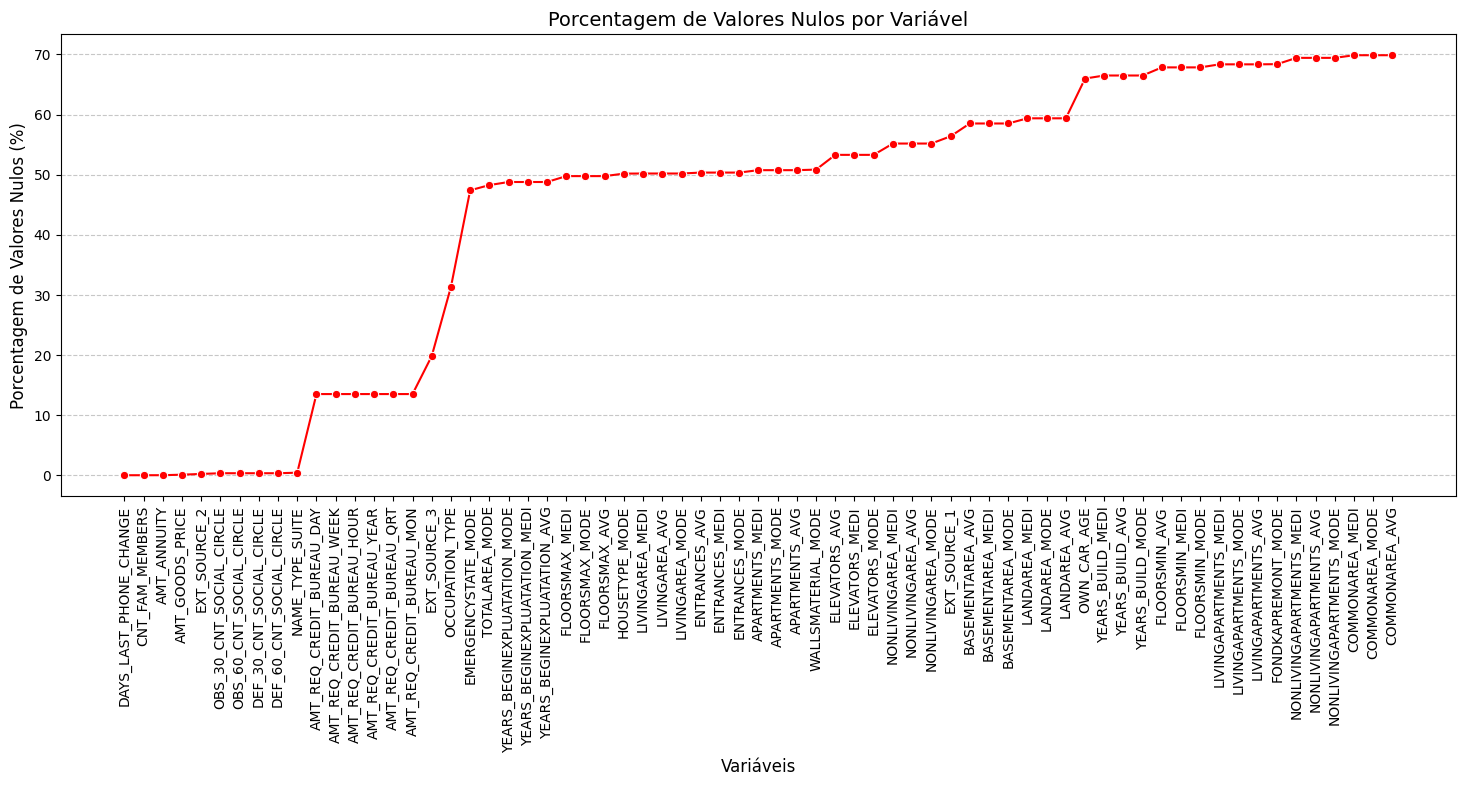

In [189]:
missing_values_app_train = plot_missing_values(app_train_df)

In [190]:
missing_values_app_train

DAYS_LAST_PHONE_CHANGE           0.000325
CNT_FAM_MEMBERS                  0.000650
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
EXT_SOURCE_2                     0.214626
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
NAME_TYPE_SUITE                  0.420148
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
EXT_SOURCE_3                    19.825307
OCCUPATION_TYPE                 31.345545
EMERGENCYSTATE_MODE             47.398304
TOTALAREA_MODE                  48.268517
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_MEDI                  49

Analisando o gráfico é possível observar um padrão. As variáveis que estão "normalizadas" (de acordo com o documento de descrições) sobre o local onde o cliente vive, ou seja, aquelas variáveis que possuem sufixos de **_AVG, _MODE, _MEDI**, são as que possuem mais valores nulos.

É interessante realizar alguns questionamentos:<br>

**Informações sobre o local onde o cliente vive podem realmente impactar na análise de risco de crédito?** <br>
Bom, pode sim existir uma relação sobre os aspectos do local onde o cliente está vivendo com sua capacidade de pagamento.

**Imputar informações à esses tipos de variáveis, pela quantidade de valores nulos, seria uma boa medida?** <br>
Essa pergunta pode ser respondida


Variáveis como **OWN_CAR_AGE**, **OCCUPATION_TYPE** possuem muitos valores faltantes pois não são todos os clientes que possuem um carro próprio.

### Análise da variável TARGET

In [191]:
def visualize_histplot(df, feature, stat='count'):
    """
    Plota um histograma para uma variável numérica.
    
    Args:
        df (DataFrame): DataFrame que contém os dados.
        feature (str): Nome da variável a ser visualizada.
        stat (str): Estatística do histograma ('count', 'density', etc.).
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=20, stat=stat, kde=False)
    plt.title(f"Distribuição da variável {feature}", fontsize=14)
    plt.xlabel(f"Variável {feature}")
    plt.ylabel("Registros")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


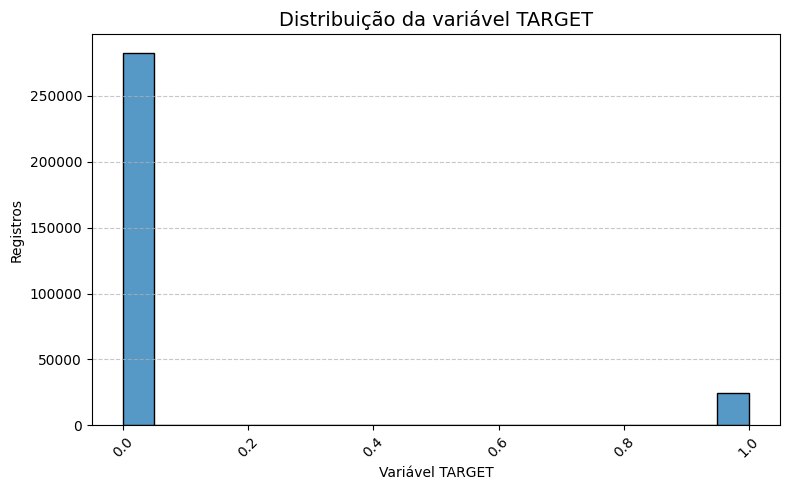

In [192]:
visualize_histplot(app_train_df, 'TARGET')

O gráfico acima da distribuição dos valores da variável **TARGET** evidencia que os dados para esta variável estão **DESBALANCEADOS**.
- Isso pois a proporção de clientes que não possuíram atrasos no pagamento(0) é muito maior do que os que tiveram algum atraso(1).
- Essa proporção não deve representar a realidade. Portanto, com a utilização das variáveis certas, com tratamentos adequados, essa distribuição deve mudar.

### Análise da distribuição de variáveis categóricas

In [193]:
categorical_vars = app_train_df.select_dtypes(exclude='number').columns
categorical_vars

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [194]:
def subplots_cat_vars(df):
    categorical_vars = df.select_dtypes(exclude='number').columns
    num_vars = len(categorical_vars)

    num_cols_subplot = 4  # Número fixo de colunas
    num_rows = int(np.ceil(num_vars / num_cols_subplot))  # Definir o número de linhas dinamicamente
    
    fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(5 * num_cols_subplot, 4 * num_rows))  
    
    # Transformar em array 1D para facilitar indexação
    axes = axes.flatten()  

    for i, var in enumerate(categorical_vars):
        df[var].value_counts().plot(kind="bar", ax=axes[i], edgecolor='black')
        axes[i].set_title(f'Distribuição {var}')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylabel('Frequência')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

        # Ocultar subplots vazios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

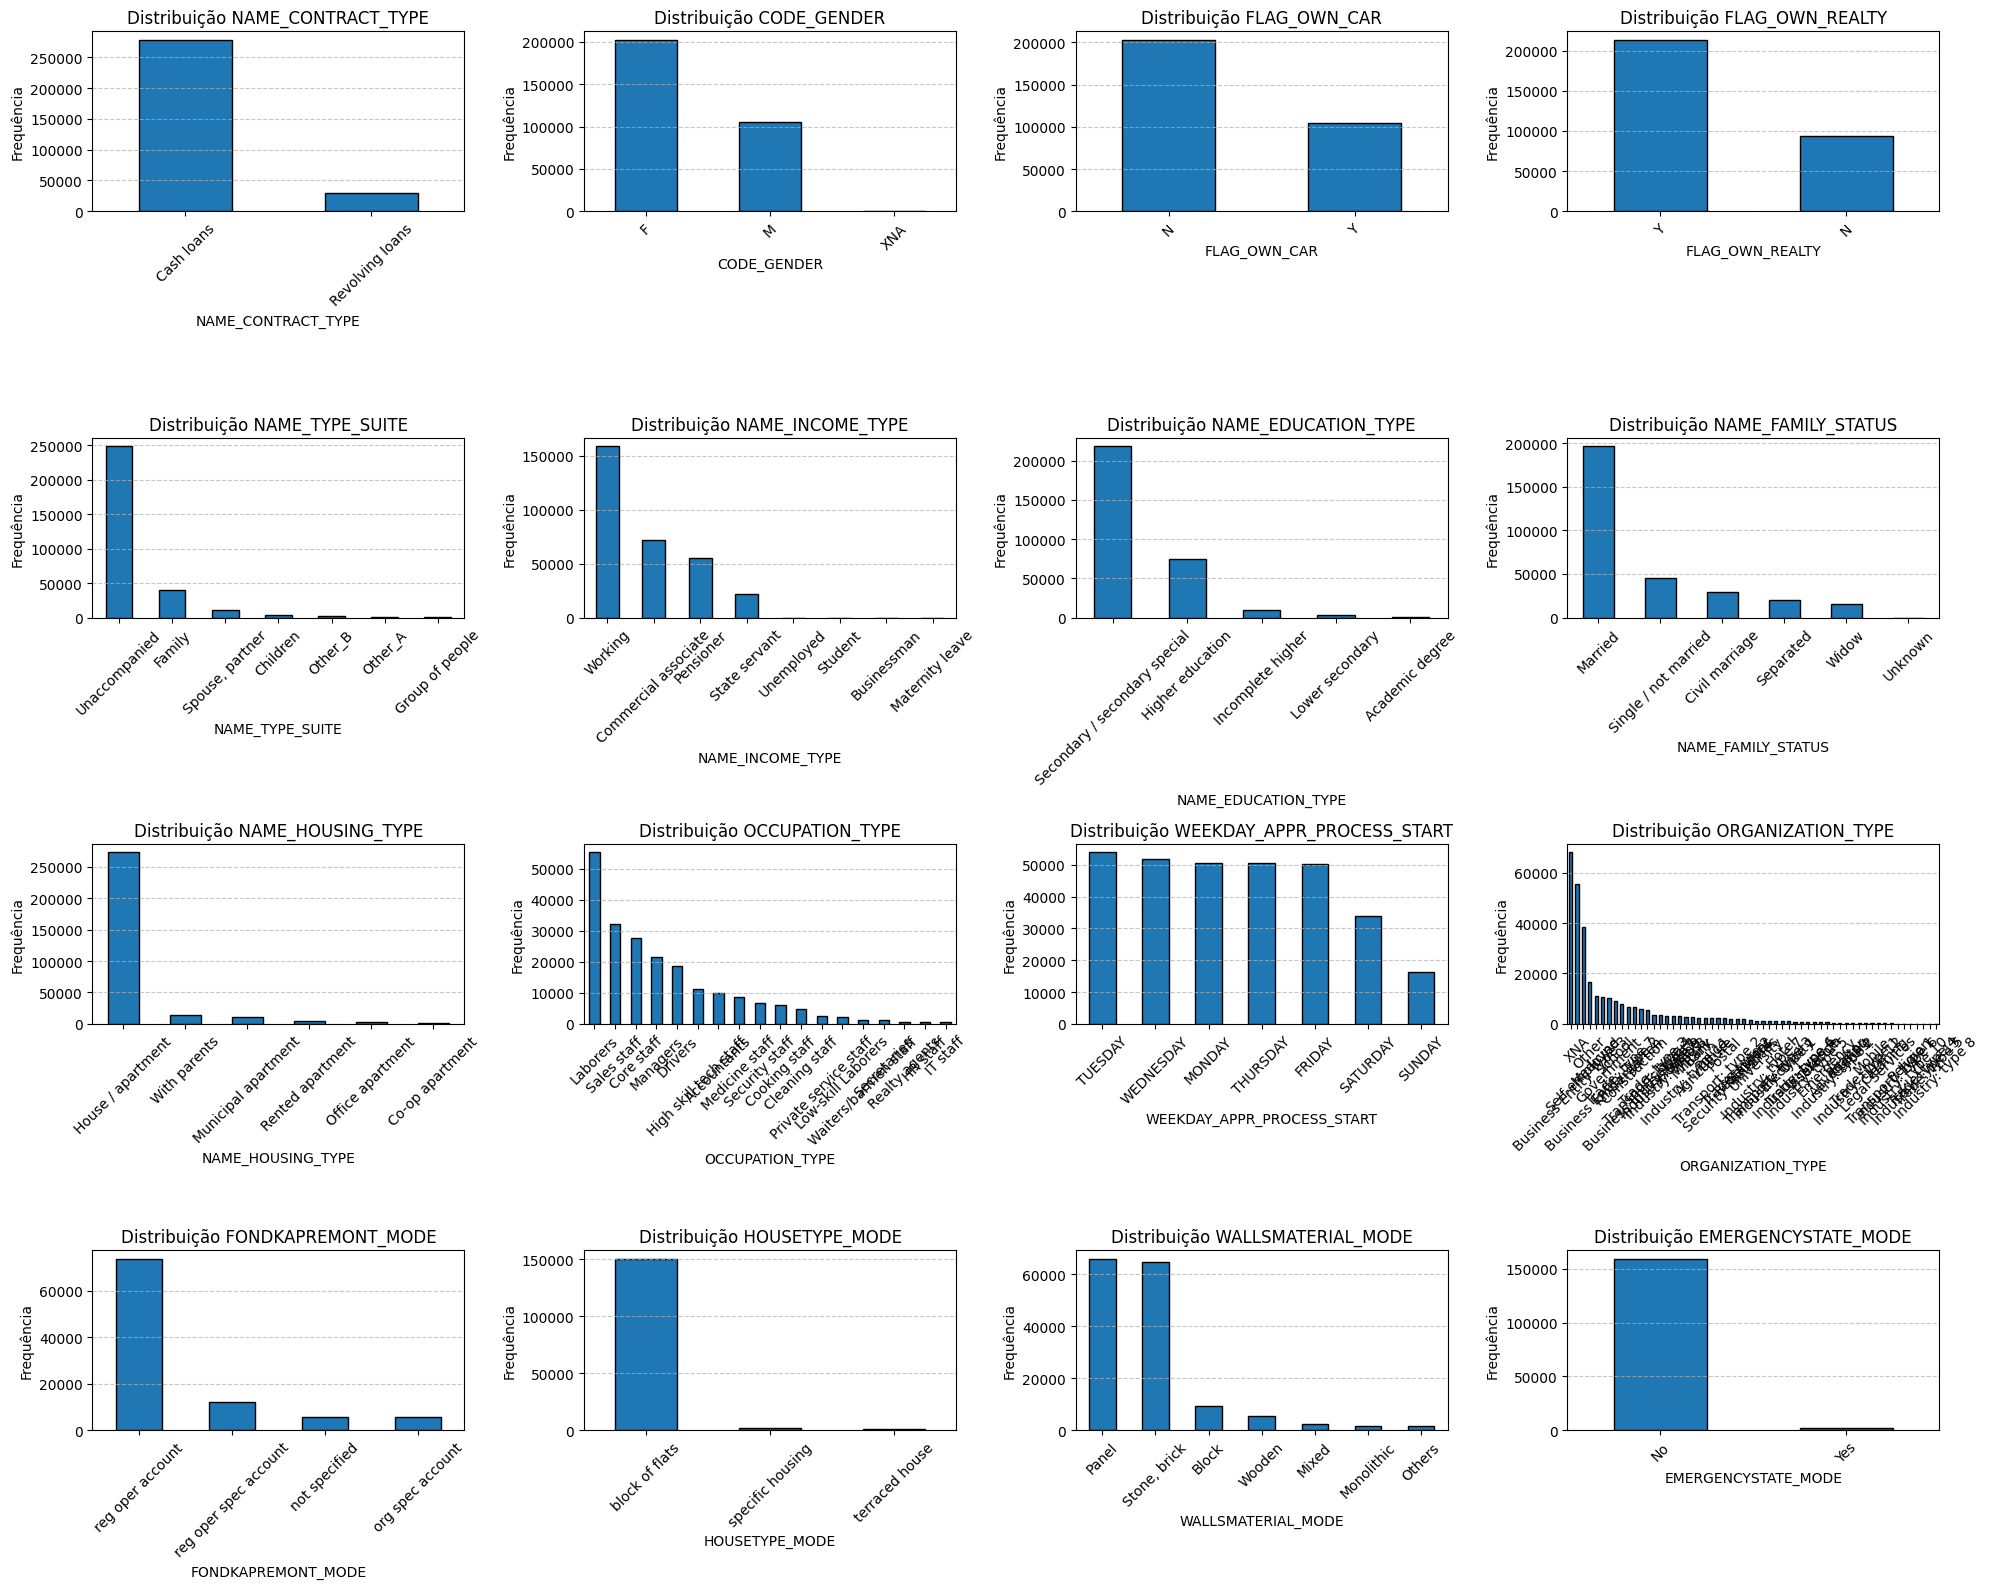

In [195]:
subplots_cat_vars(app_train_df)

Além disso, variáveis como **ORGANIZATION_TYPE**, **OCCUPATION_TYPE**, **NAME_EDUCATION_TYPE**, **NAME_FAMILY_STATUS** e **NAME_INCOME_TYPE** podem ser manipuladas para redução da quantidade de categorias (redução de dimensionalidade).

Também é possível refletir que variáveis como **CODE_GENDER**, **NAME_TYPE_SUITE** e **WEEKDAY_APPR_PROCESS_START** não fazem sentido de manter **por não contribuírem** em uma análise de risco de inadimplência.

Além disso, algumas variáveis relacionadas à construção que o cliente vive também podem não fazer sentido para a análise, como: **HOUSETYPE_MODE**, **WALLSMATERIAL_MODE**, **FONDKAPREMONT_MODE**, **EMERGENCYSTATE_MODE** e **NAME_HOUSING_TYPE**. Isso se deve pela suas distribuições serem muito desbalanceadas ou por não passarem informações muito relevantes.

### Manipulando variáveis categóricas

Removendo variáveis que não contribuem para a análise do risco de inadimplência

In [196]:
app_train_df_handled = app_train_df.copy()

In [197]:
app_train_df_handled = app_train_df_handled.drop(columns=['CODE_GENDER', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 
                                                          'HOUSETYPE_MODE', 'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE', 
                                                          'EMERGENCYSTATE_MODE', 'NAME_HOUSING_TYPE'])

In [198]:
print("Variáveis categóricas: ", app_train_df_handled.select_dtypes(exclude='number').columns)

Variáveis categóricas:  Index(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')


Manipulando as variáveis:
- ORGANIZATION_TYPE
- OCCUPATION_TYPE

In [199]:
app_train_df_handled['ORGANIZATION_TYPE'].value_counts().sort_index()

ORGANIZATION_TYPE
Advertising                 429
Agriculture                2454
Bank                       2507
Business Entity Type 1     5984
Business Entity Type 2    10553
Business Entity Type 3    67992
Cleaning                    260
Construction               6721
Culture                     379
Electricity                 950
Emergency                   560
Government                10404
Hotel                       966
Housing                    2958
Industry: type 1           1039
Industry: type 10           109
Industry: type 11          2704
Industry: type 12           369
Industry: type 13            67
Industry: type 2            458
Industry: type 3           3278
Industry: type 4            877
Industry: type 5            599
Industry: type 6            112
Industry: type 7           1307
Industry: type 8             24
Industry: type 9           3368
Insurance                   597
Kindergarten               6880
Legal Services              305
Medicine              

As categorias da variável **ORGANIZATION_TYPE** podem ser reagrupadas da seguinte forma:

- Industry 
- Transport
- Trade
- Business
- Public Sector
- Finance
- Service Industry
- Self-employed
- Unknown
- Other

Cada categoria foi agrupada em uma categoria mais abrangente, de forma que sua dimensionalidade seja reduzida, sendo importante se ela for utilizada para o treinamento do modelo.

In [200]:
def categorizing_organization_type(organization):
    if 'Industry' in organization:
        return 'Industry'
    elif 'Transport' in organization:
        return 'Transport'
    elif 'Trade' in organization:
        return 'Trade'
    elif 'Business' in organization:
        return 'Business Entity'
    elif any(gov in organization for gov in ['Government', 'Police', 'Military', 'Security Ministries']):
        return 'Public Sector'
    elif any(med in organization for med in ['Medicine', 'Hospital']):
        return 'Healthcare'
    elif any(edu in organization for edu in ['School', 'University', 'Kindergarten']):
        return 'Education'
    elif any(fin in organization for fin in ['Bank', 'Insurance']):
        return 'Finance'
    elif 'Self' in organization:
        return 'Self-employed'
    elif any(serv in organization for serv in ['Services', 'Restaurant', 'Hotel', 'Cleaning', 'Telecom', 'Electricity', 'Mobile']):
        return 'Service Industry'
    elif 'XNA' in organization:
        return 'Unknown'
    else:
        return 'Other'

In [201]:
app_train_df_handled['ORGANIZATION_CATEGORY'] = app_train_df_handled['ORGANIZATION_TYPE'].apply(categorizing_organization_type)

In [202]:
app_train_df_handled['ORGANIZATION_CATEGORY'].value_counts()

ORGANIZATION_CATEGORY
Business Entity     84529
Unknown             55374
Self-employed       38412
Other               36069
Public Sector       17353
Education           17100
Trade               14315
Industry            14311
Healthcare          11193
Transport            8990
Service Industry     6761
Finance              3104
Name: count, dtype: int64

In [203]:
app_train_df_handled = app_train_df_handled.drop(columns='ORGANIZATION_TYPE', axis=1) #removendo a coluna original

As categorias da variáveis **OCCUPATION_TYPE** podem ser reagrupadas da seguinte forma:


- Laborers:	Laborers, Low-skill Laborers, Cleaning staff, Cooking staff, Waiters/barmen staff
- Customer Service:	Sales staff, Realty agents, Private service staff
- Core Staff:	Core staff, Secretaries, HR staff
- Technical Service:	High skill tech staff, Accountants, IT staff, Medicine staff
- Managers:	Managers
- Security Service: Security staff
- Transport Service: Drivers

In [204]:
app_train_df_handled['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [205]:
def categorizing_occupation_type(occupation):

    if pd.isna(occupation):
        return '' # substituindo valores nulos por enquanto(é possível filtrá-los posteriormente)
    
    if any(labor in occupation for labor in ['Laborers', 'Low-skill Laborers', 'Cleaning staff', 'Cooking staff', 'Waiters/barmen staff']):
        return 'Laborer'
    elif any(job in occupation for job in ['Sales staff', 'Realty agents', 'Private service staff']):
        return 'Customer Service'
    elif any(core in occupation for core in ['Core staff', 'Secretaries', 'HR staff']):
        return 'Core Staff'
    elif any(tech in occupation for tech in ['High skill tech staff', 'Accountants', 'IT staff', 'Medicine staff']):
        return 'Technical Service'
    elif occupation == 'Managers':
        return 'Manager'
    elif occupation == 'Security Staff':
        return 'Security Service'
    elif occupation == 'Drivers':
        return 'Transport Service'

app_train_df_handled['OCCUPATION_CATEGORY'] = app_train_df_handled['OCCUPATION_TYPE'].apply(categorizing_occupation_type)

In [206]:
app_train_df_handled['OCCUPATION_CATEGORY'].value_counts()

OCCUPATION_CATEGORY
                     96391
Laborer              69226
Customer Service     35505
Technical Service    30256
Core Staff           29438
Manager              21371
Transport Service    18603
Name: count, dtype: int64

In [207]:
app_train_df_handled = app_train_df_handled.drop(columns='OCCUPATION_TYPE', axis=1) #removendo a coluna original

As categorias da variável **NAME_INCOME_TYPE** podem ser reagrupadas da seguinte forma:
- Work
- Pension
- Other

In [208]:
app_train_df_handled['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [209]:
def categorizing_income_type(income):
    if any(inc in income for inc in ['Working', 'Commercial associate', 'State servant', 'Businessman']):
        return 'Work'
    elif income == 'Pensioner':
        return 'Pension'
    else:
        return 'Other'

app_train_df_handled['INCOME_SOURCE'] = app_train_df_handled['NAME_INCOME_TYPE'].apply(categorizing_income_type)

In [210]:
app_train_df_handled['INCOME_SOURCE'].value_counts()

INCOME_SOURCE
Work       252104
Pension     55362
Other          45
Name: count, dtype: int64

In [211]:
app_train_df_handled = app_train_df_handled.drop(columns='NAME_INCOME_TYPE', axis=1) #removendo a coluna original

Como são poucos registros, faz sentido remover a categoria 'OTHER', também para reduzir a dimensionalidade

In [212]:
app_train_df_handled = app_train_df_handled.drop(app_train_df_handled[app_train_df_handled['INCOME_SOURCE'] == 'Other'].index)

In [213]:
app_train_df_handled['INCOME_SOURCE'].value_counts()

INCOME_SOURCE
Work       252104
Pension     55362
Name: count, dtype: int64

As categorias da variável **NAME_EDUCATION_TYPE** podem ser reagrupadas da seguinte forma:
- Secondary
- Higher
- Incomplete Higher
- Lower Secondary

In [214]:
app_train_df_handled['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218365
Higher education                  74848
Incomplete higher                 10273
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [215]:
def categorizing_education_type(education):
    if any(educ in education for educ in ['Higher education', 'Academic degree']):
        return 'Higher'
    elif education == 'Secondary / secondary special':
        return 'Secondary'
    else:
        return education

app_train_df_handled['EDUCATION_TYPE'] = app_train_df_handled['NAME_EDUCATION_TYPE'].apply(categorizing_education_type)

In [216]:
app_train_df_handled = app_train_df_handled.drop(columns='NAME_EDUCATION_TYPE', axis=1) #removendo a coluna original

In [217]:
app_train_df_handled['EDUCATION_TYPE'].value_counts()

EDUCATION_TYPE
Secondary            218365
Higher                75012
Incomplete higher     10273
Lower secondary        3816
Name: count, dtype: int64

As categorias da variável **NAME_FAMILY_STATUS** podem ser reagrupadas da seguinte forma:
- Married
- Single
- Separated
- Widow

In [218]:
def categorizing_family_status(family):
    
    if any(fam in family for fam in ['Married', 'Civil marriage']):
        return 'Married'
    elif family == 'Single / not married ':
        return 'Single'
    else:
        return family

app_train_df_handled['FAMILY_STATUS'] = app_train_df_handled['NAME_FAMILY_STATUS'].apply(categorizing_family_status)

In [219]:
app_train_df_handled = app_train_df_handled.drop(columns='NAME_FAMILY_STATUS', axis=1) #removendo a coluna original

In [220]:
app_train_df_handled = app_train_df_handled.drop(app_train_df_handled[app_train_df_handled['FAMILY_STATUS'] == 'Unknown'].index)

In [221]:
app_train_df_handled['FAMILY_STATUS'].value_counts()

FAMILY_STATUS
Married                 226176
Single / not married     45435
Separated                19768
Widow                    16085
Name: count, dtype: int64

### Análise de variáveis numéricas

In [310]:
def subplots_numeric_vars(df, bins=30):
    numerical_vars = df.select_dtypes(include='number').columns
    num_vars = len(numerical_vars)

    num_cols_subplot = 4  # Número fixo de colunas
    num_rows = int(np.ceil(num_vars / num_cols_subplot))  # Definir o número de linhas dinamicamente
    
    fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(4 * num_cols_subplot, 4 * num_rows))  
    
    # Transformar em array 1D para facilitar indexação
    axes = axes.flatten()  

    for i, var in enumerate(numerical_vars):
        df[var].hist(bins=bins, ax=axes[i], edgecolor='black')
        axes[i].set_title(f'Distribuição {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frequência')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Ocultar eixos vazios se houver menos variáveis que subplots criados
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [223]:
numerical_vars = app_train_df.select_dtypes(include=['number']).columns
numerical_vars

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

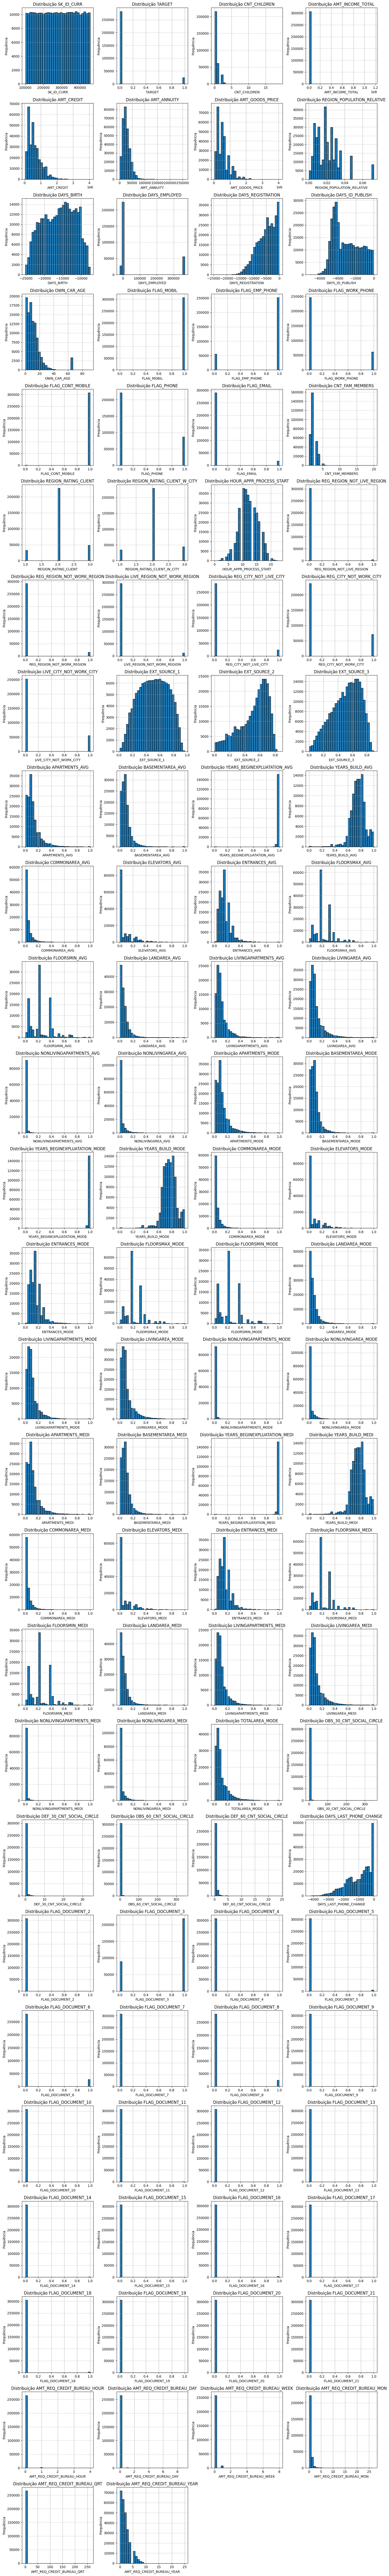

In [224]:
subplots_numeric_vars(app_train_df)

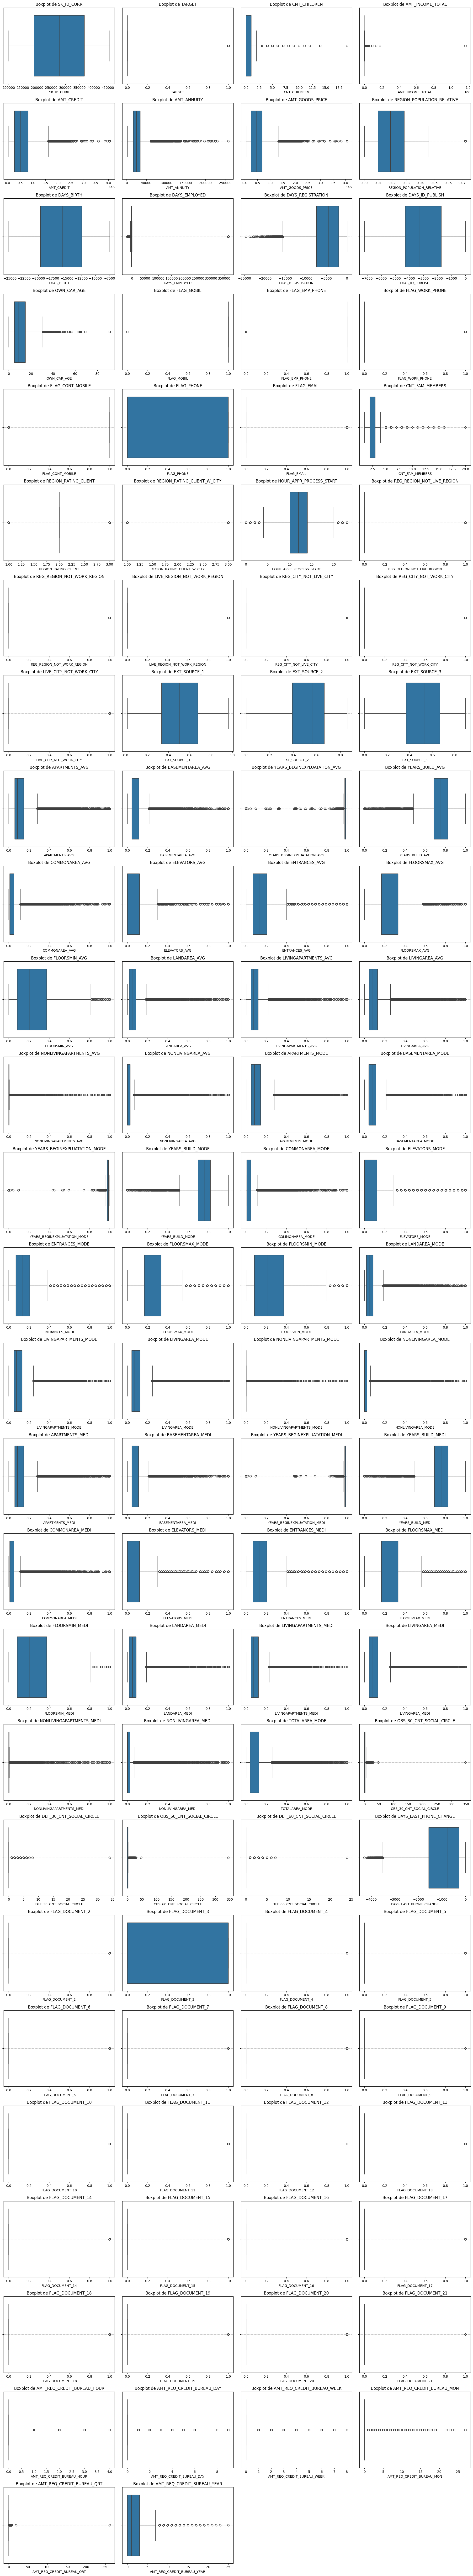

In [338]:
subplots_outliers(app_train_df)

Como são muitas variáveis numéricas, é mais simples analisá-las por partes.

As variáveis **FLAG_DOCUMENT** são muito desbalanceadas. A maioria dos clientes não proveram grande parte dos documentos. Portanto, os clientes proverem ou não os documentos podem não agregar muito na previsão de risco de inadimplência.

In [225]:
#excluindo variáveis FLAG_DOCUMENT
columns_drop = []

for var in numerical_vars:
    if 'FLAG_DOCUMENT' in var :
        columns_drop.append(var)

print(columns_drop)

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [226]:
app_train_df_handled = app_train_df_handled.drop(columns=columns_drop, axis=1)

In [227]:
def plot_spearman_corr(df):
    df_corr_matrix = df[df.select_dtypes(include=['number']).columns].corr(method='spearman')

    plt.figure(figsize=(14,12))
    sns.heatmap(df_corr_matrix, annot=False, cmap='coolwarm', center=0, vmin=-1, vmax=1);
    plt.title("Correlação de Spearman")
    plt.show()

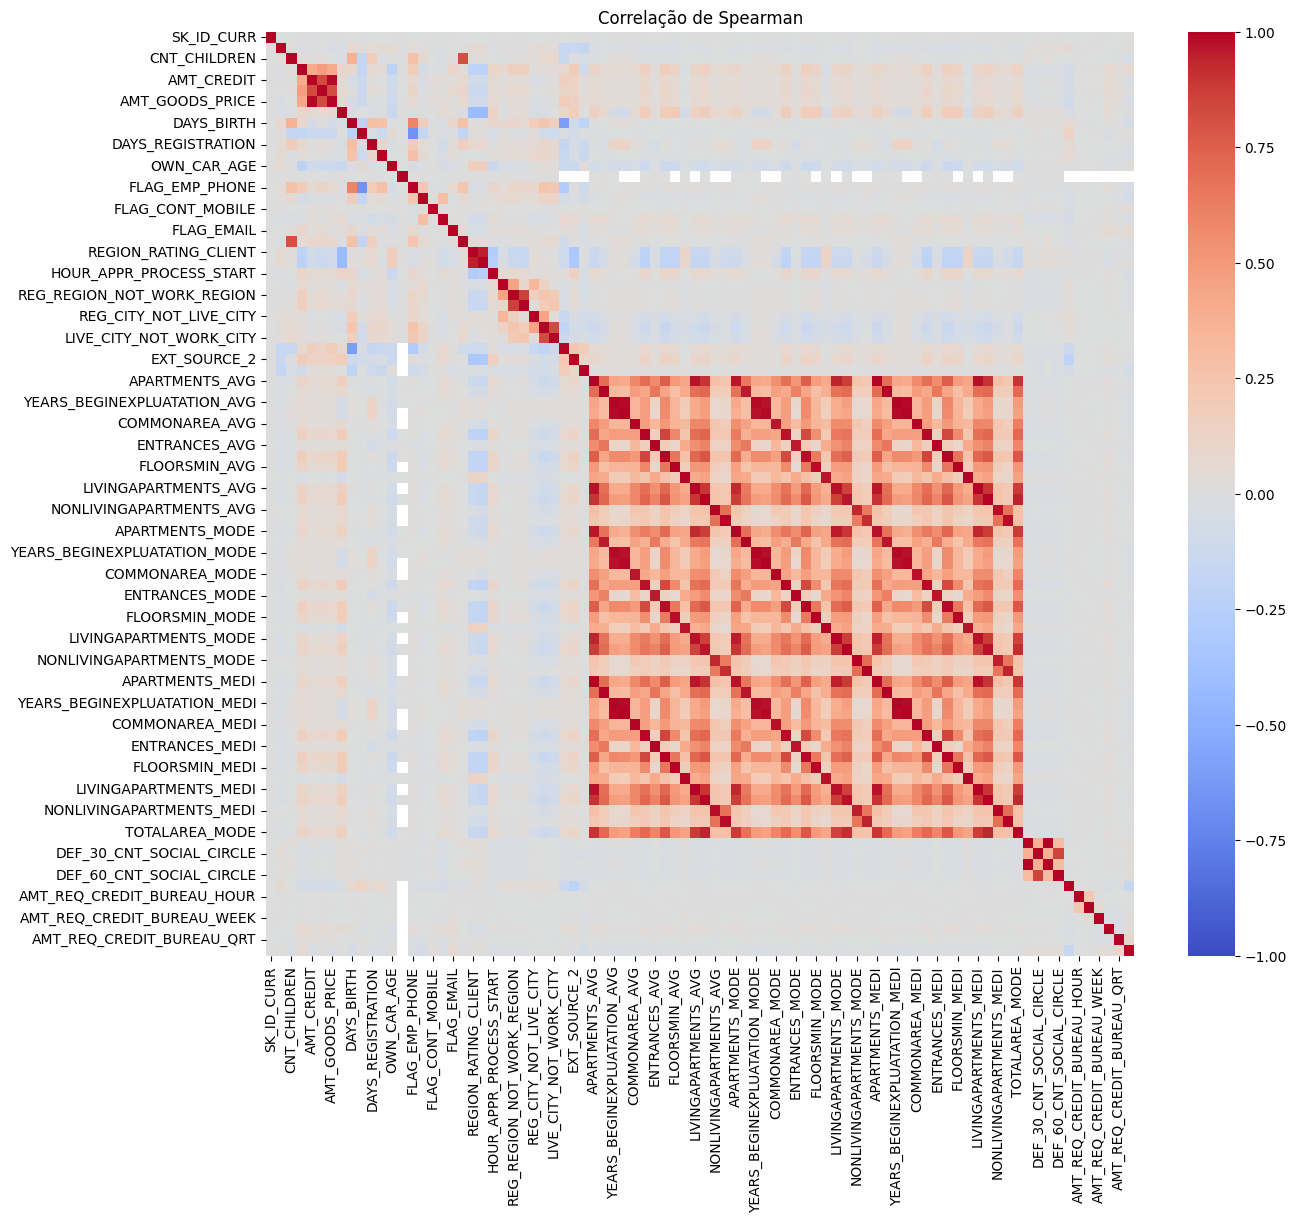

In [228]:
plot_spearman_corr(app_train_df_handled)

Através desse gráfico de correlação de Spearman, é possível observar que as variáveis independentes sobre a construção que o cliente vive são altamente **correlacionadas**, o que pode representar um problema de **multicolinearidade**.

Essas variáveis serem correlacionadas é algo esperado, isso por conta de padrões de construção de casas/apartamentos, ou de serem retiradas de uma banco de dados de uma imobiliária. Porém a questão da **redundância** e alta correlação, o que pode representar multiconlinearidade, aliada com uma alta porcentagem de valores missing, faz com que utilizar essas variáveis pareça inviável.

In [229]:
columns_to_drop = []

for var in app_train_df_handled.columns:
    if any(suffix in var for suffix in ['_AVG', '_MODE', '_MEDI']):
        columns_to_drop.append(var)

print(columns_to_drop)

['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']


In [230]:
app_train_df_handled = app_train_df_handled.drop(columns=columns_to_drop, axis=1)

In [231]:
app_train_df_handled.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START  

Há mais alguma variável numérica que podemos remover do dataframe? <br>

Podemos analisar o heatmap de correlação, a distribuição das variáveis e a porcentagem de missing values das variáveis, novamente

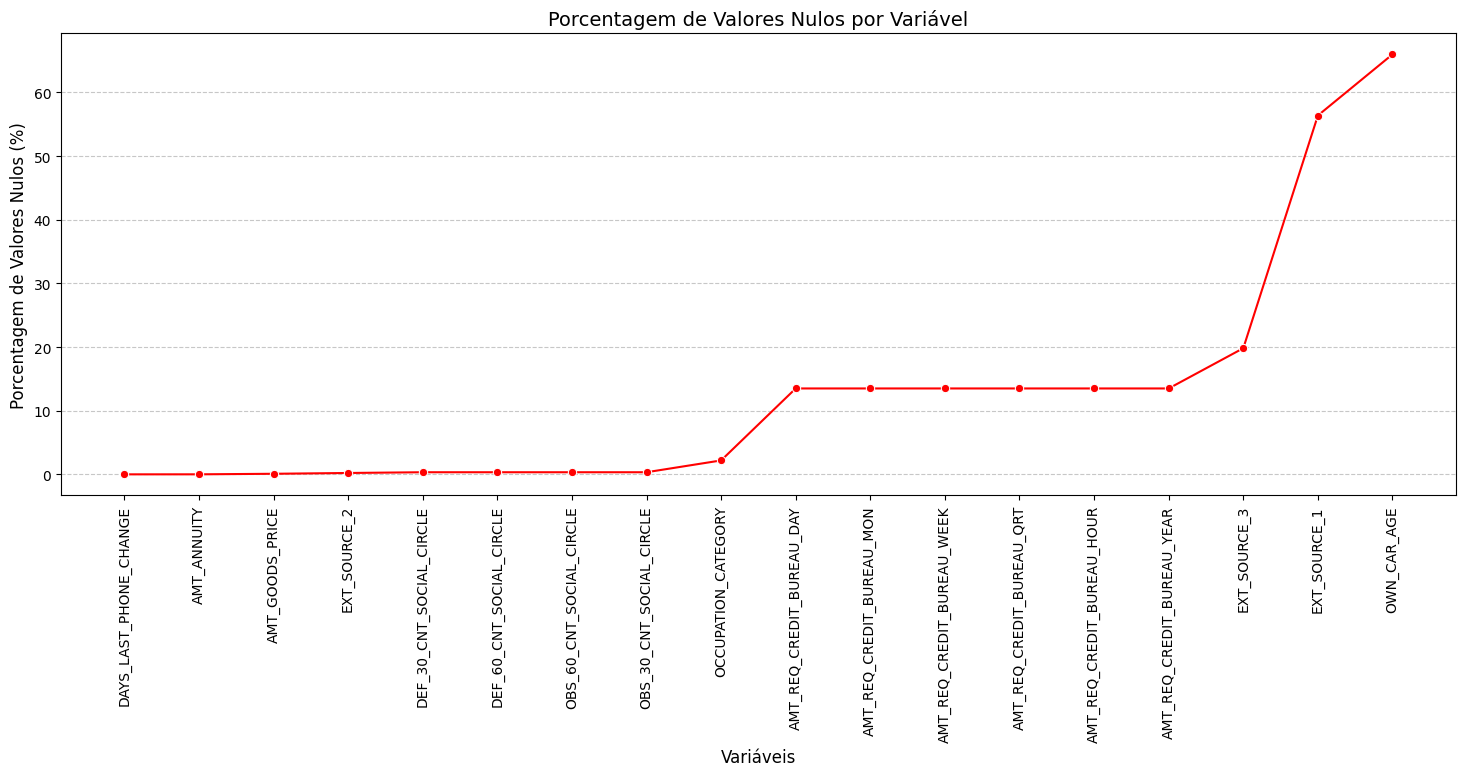

DAYS_LAST_PHONE_CHANGE         0.000325
AMT_ANNUITY                    0.003903
AMT_GOODS_PRICE                0.089767
EXT_SOURCE_2                   0.214659
DEF_30_CNT_SOCIAL_CIRCLE       0.331096
DEF_60_CNT_SOCIAL_CIRCLE       0.331096
OBS_60_CNT_SOCIAL_CIRCLE       0.331096
OBS_30_CNT_SOCIAL_CIRCLE       0.331096
OCCUPATION_CATEGORY            2.185947
AMT_REQ_CREDIT_BUREAU_DAY     13.495564
AMT_REQ_CREDIT_BUREAU_MON     13.495564
AMT_REQ_CREDIT_BUREAU_WEEK    13.495564
AMT_REQ_CREDIT_BUREAU_QRT     13.495564
AMT_REQ_CREDIT_BUREAU_HOUR    13.495564
AMT_REQ_CREDIT_BUREAU_YEAR    13.495564
EXT_SOURCE_3                  19.819556
EXT_SOURCE_1                  56.381235
OWN_CAR_AGE                   65.989839
dtype: float64

In [232]:
plot_missing_values(app_train_df_handled)

Vemos que as variáveis **EXT_SOURCE_1** e **OWN_CAR_AGE** possuem muitos valores nulos. <br>

**OWN_CAR_AGE** é uma feature que diz a idade do carro que o cliente tem. Porém, como nem todos os cliente vão ter carros, é entendível a quantidade de valores faltantes que essa variável possui. Ela pode ter relevância no modelo, porém não é uma variável que imputar valores seria interessante, pois isso pode gerar um entendimento de que clientes possuem carros, sendo que na realidade, eles não possuem.

**EXT_SOURCE_1** é uma feature que não diz muito. Ela é apenas um score normalizado do cliente de uma fonte externa. Portanto, com alta porcentagem de missing values, não faz sentido imputar valores e mantê-las na base de dados.

In [233]:
app_train_df_handled = app_train_df_handled.drop(columns=['OWN_CAR_AGE', 'EXT_SOURCE_1'])

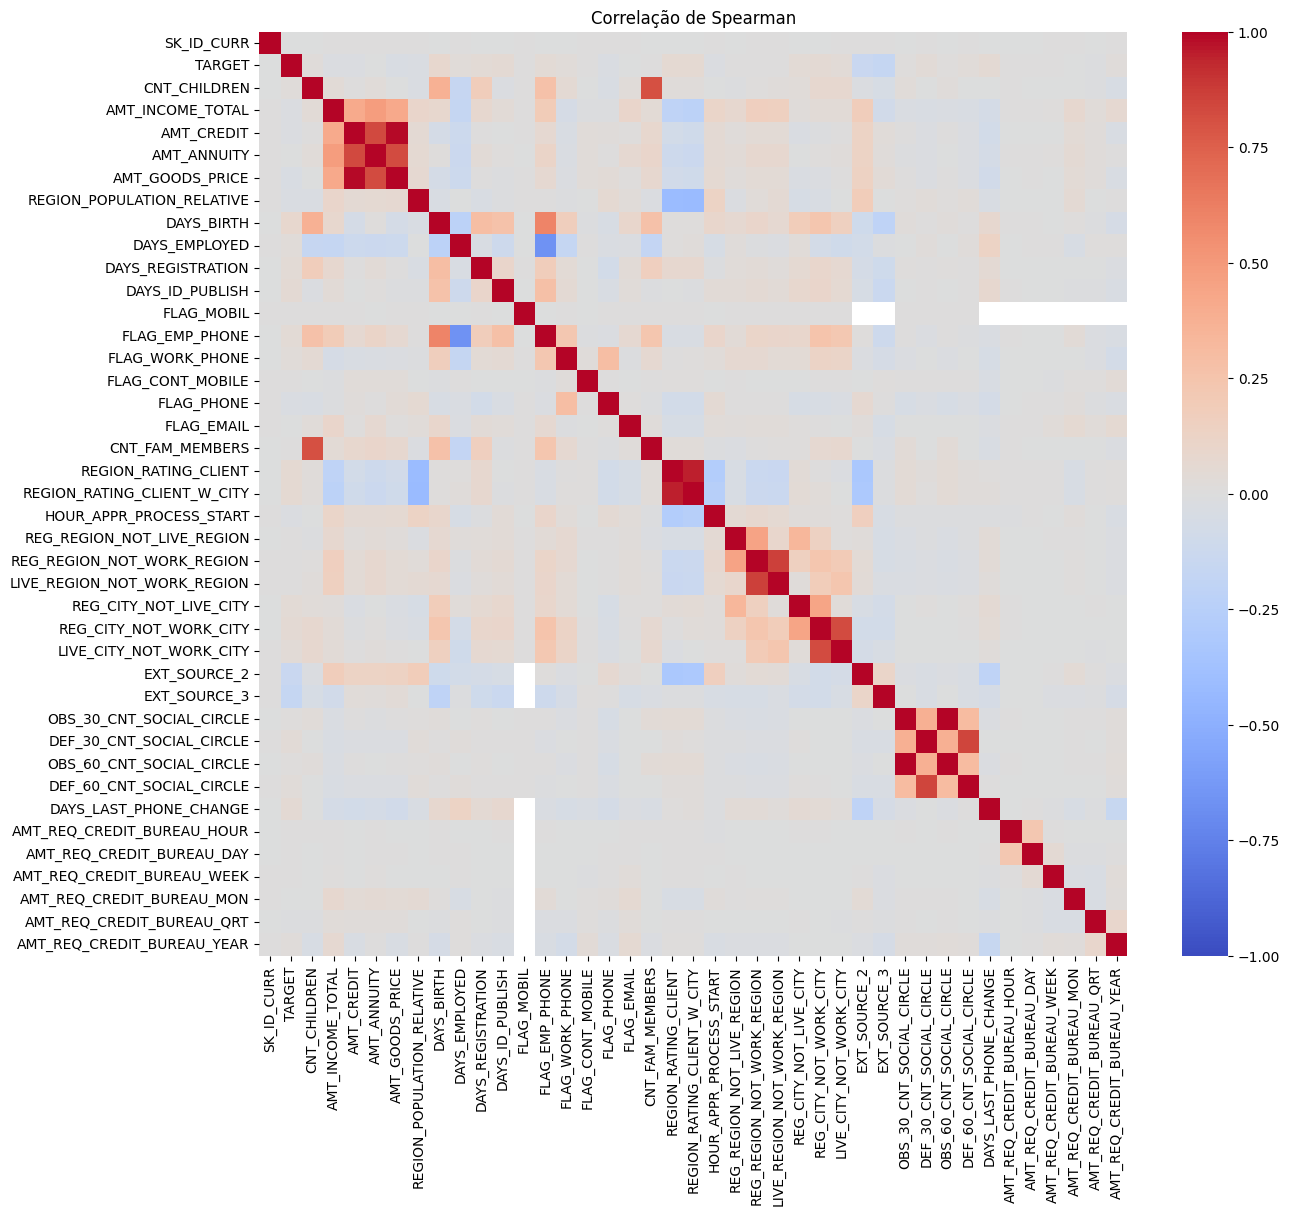

In [234]:
plot_spearman_corr(app_train_df_handled)

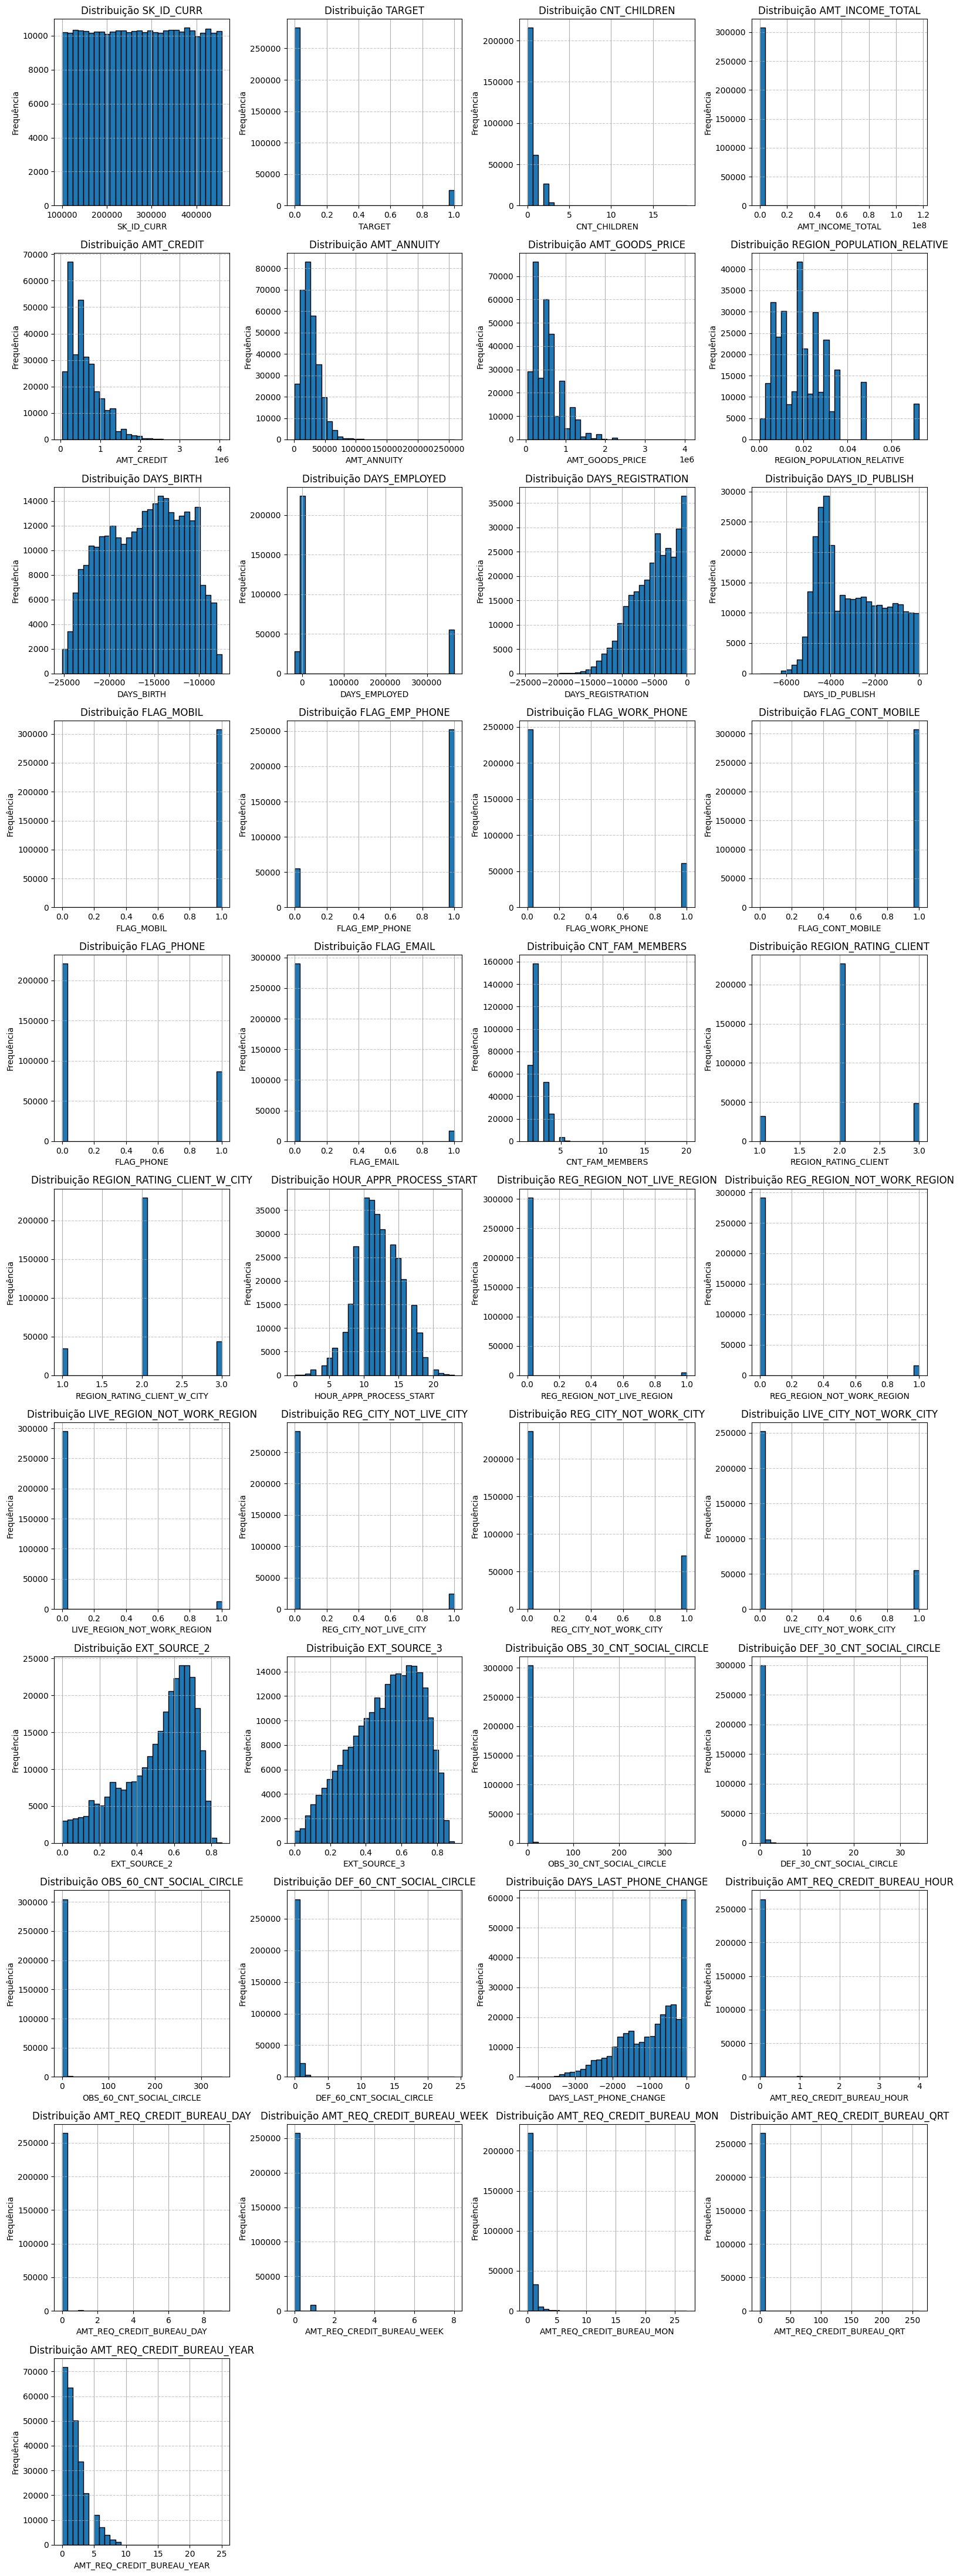

In [235]:
subplots_numeric_vars(app_train_df_handled)

In [236]:
app_train_df_handled.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGIO

In [237]:
(app_train_df_handled['REG_REGION_NOT_LIVE_REGION'].value_counts(normalize=True)*100).round(2)

REG_REGION_NOT_LIVE_REGION
0    98.49
1     1.51
Name: proportion, dtype: float64

In [238]:
(app_train_df_handled['REG_REGION_NOT_WORK_REGION'].value_counts(normalize=True)*100).round(2)

REG_REGION_NOT_WORK_REGION
0    94.92
1     5.08
Name: proportion, dtype: float64

In [239]:
(app_train_df_handled['REG_CITY_NOT_LIVE_CITY'].value_counts(normalize=True)*100).round(2)

REG_CITY_NOT_LIVE_CITY
0    92.18
1     7.82
Name: proportion, dtype: float64

In [240]:
(app_train_df_handled['LIVE_REGION_NOT_WORK_REGION'].value_counts(normalize=True)*100).round(2)

LIVE_REGION_NOT_WORK_REGION
0    95.93
1     4.07
Name: proportion, dtype: float64

In [241]:
(app_train_df_handled['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100).round(2)

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.44
1.0     0.49
2.0     0.04
3.0     0.02
4.0     0.01
5.0     0.00
6.0     0.00
9.0     0.00
8.0     0.00
Name: proportion, dtype: float64

In [242]:
(app_train_df_handled['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100).round(2)

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.39
1.0     0.59
2.0     0.02
3.0     0.00
4.0     0.00
Name: proportion, dtype: float64

In [243]:
(app_train_df_handled['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100).round(2)

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.79
1.0     3.09
2.0     0.07
3.0     0.02
4.0     0.01
6.0     0.01
5.0     0.00
8.0     0.00
7.0     0.00
Name: proportion, dtype: float64

Excluindo variáveis com base na suas distribuições

In [244]:
drop_columns = ['FLAG_CONT_MOBILE', 'FLAG_MOBIL', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 
                'REG_REGION_NOT_WORK_REGION', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 
                'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY']

app_train_df_handled = app_train_df_handled.drop(columns=drop_columns, axis=1)

Excluindo variáveis com base no bom senso(que não fazem sentido para a análise)

In [246]:
app_train_df_handled.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_PHONE                       int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START          int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
EXT_SOURCE_2                   float64
EXT_SOURCE_3             

In [252]:
columns_drop = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
               'HOUR_APPR_PROCESS_START', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
                'DAYS_BIRTH', 'DAYS_REGISTRATION']

app_train_df_handled = app_train_df_handled.drop(columns=columns_drop, axis=1)

In [253]:
app_train_df_handled.shape

(307464, 29)

## Dataset bureau

### Análise de Missing Values

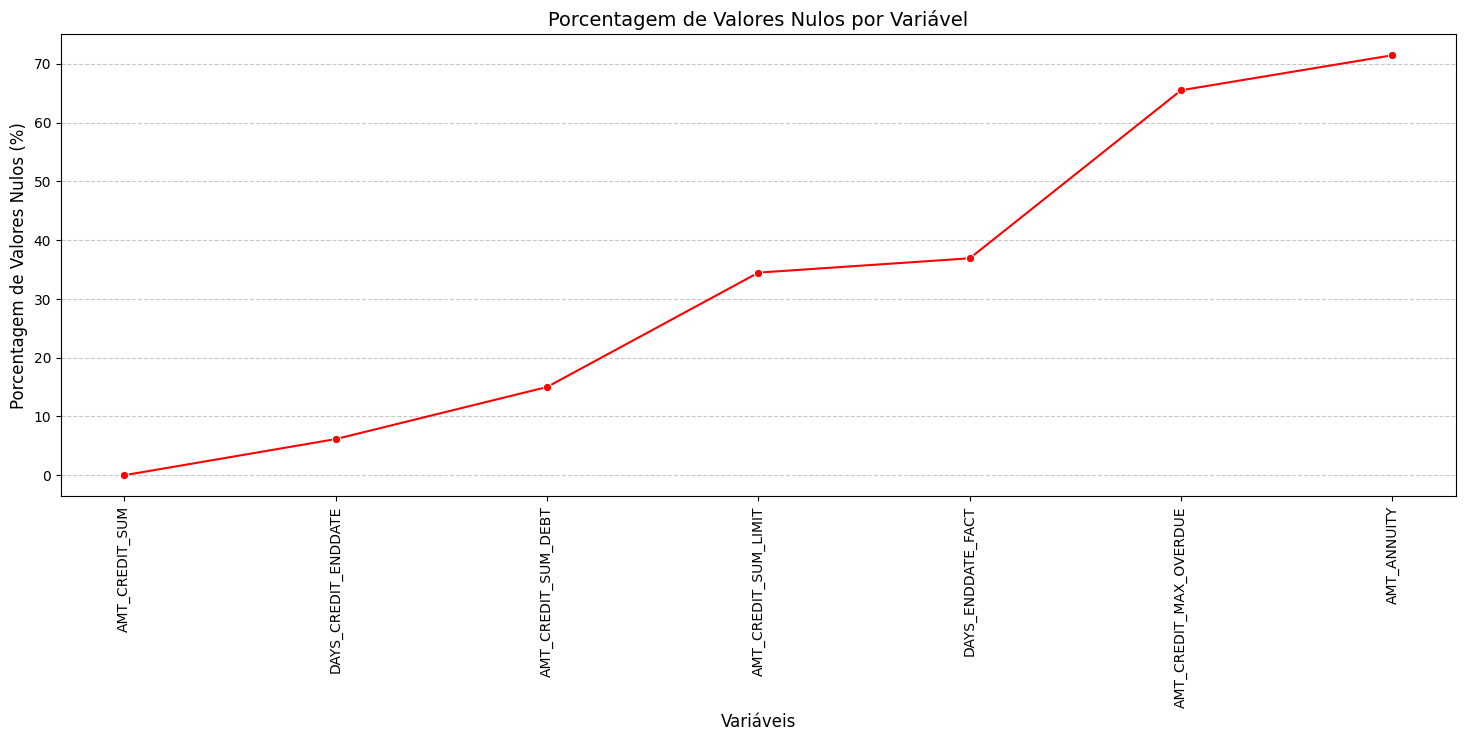

AMT_CREDIT_SUM             0.000757
DAYS_CREDIT_ENDDATE        6.149573
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
AMT_ANNUITY               71.473490
dtype: float64

In [279]:
plot_missing_values(bureau_df)

Excluindo variáveis **AMT_CREDIT_MAX_OVERDUE** e **AMT_ANNUITY** pela alta quantidade de valores nulos

In [280]:
bureau_df_handled = bureau_df.copy()

In [281]:
bureau_df_handled = bureau_df_handled.drop(columns=['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY'], axis=1)

### Análise da distribuição das variáveis categóricas

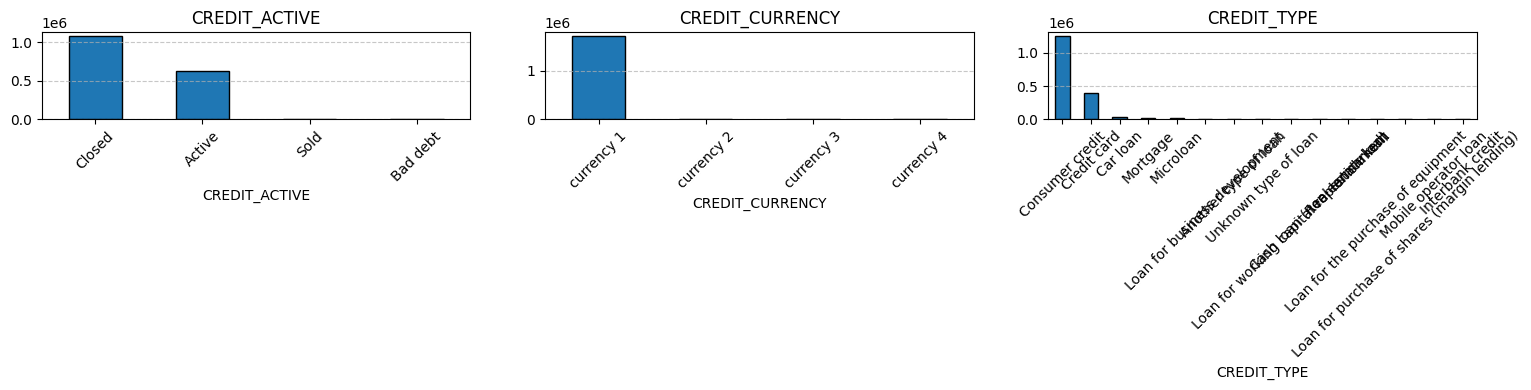

In [49]:
subplots_cat_vars(bureau_df)

A variável **CREDIT_TYPE** pode precisar de uma manipulação de categorias.

O que a variável **CREDIT_CURRENCY** quer passar como informação? Esse desbalanceamento das categorias agrega ao modelo? Vai diferenciar os clientes de alguma forma?

Excluindo **CREDIT_CURRENCY**

In [282]:
(bureau_df['CREDIT_CURRENCY'].value_counts(normalize=True)*100).round(2)

CREDIT_CURRENCY
currency 1    99.92
currency 2     0.07
currency 3     0.01
currency 4     0.00
Name: proportion, dtype: float64

In [287]:
bureau_df_handled = bureau_df_handled.drop(columns=['CREDIT_CURRENCY'], axis=1)

Manipulando **CREDIT_ACTIVE**

In [283]:
(bureau_df['CREDIT_ACTIVE'].value_counts(normalize=True)*100).round(2)

CREDIT_ACTIVE
Closed      62.88
Active      36.74
Sold         0.38
Bad debt     0.00
Name: proportion, dtype: float64

In [288]:
def categorizing_credit_active(credit):
    if credit == 'Sold' or credit == 'Bad debt':
        return 'Other'
    else:
        return credit

bureau_df_handled['CREDIT_STATUS'] = bureau_df_handled['CREDIT_ACTIVE'].apply(categorizing_credit_active)

In [290]:
bureau_df_handled['CREDIT_STATUS'].value_counts()

CREDIT_STATUS
Closed    1079273
Active     630607
Other        6548
Name: count, dtype: int64

In [289]:
bureau_df_handled = bureau_df_handled.drop(columns='CREDIT_ACTIVE', axis=1) #removendo a coluna original

Manipulando **CREDIT_TYPE**

In [284]:
(bureau_df['CREDIT_TYPE'].value_counts(normalize=True)*100).round(2)

CREDIT_TYPE
Consumer credit                                 72.92
Credit card                                     23.43
Car loan                                         1.61
Mortgage                                         1.07
Microloan                                        0.72
Loan for business development                    0.12
Another type of loan                             0.06
Unknown type of loan                             0.03
Loan for working capital replenishment           0.03
Cash loan (non-earmarked)                        0.00
Real estate loan                                 0.00
Loan for the purchase of equipment               0.00
Loan for purchase of shares (margin lending)     0.00
Mobile operator loan                             0.00
Interbank credit                                 0.00
Name: proportion, dtype: float64

In [296]:
bureau_df['CREDIT_TYPE'].value_counts()

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

In [297]:
credit_counts = bureau_df['CREDIT_TYPE'].value_counts()

In [298]:
credit_type_mapping = {credit: ("Other" if count < 30000 else credit) for credit, count in credit_counts.items()}

In [299]:
bureau_df_handled['CREDIT_TYPE_GROUP'] = bureau_df_handled['CREDIT_TYPE'].map(credit_type_mapping)

In [301]:
bureau_df_handled['CREDIT_TYPE_GROUP'].value_counts()

CREDIT_TYPE_GROUP
Consumer credit    1251615
Credit card         402195
Other                62618
Name: count, dtype: int64

In [302]:
bureau_df_handled = bureau_df_handled.drop(columns='CREDIT_TYPE', axis=1) #removendo a coluna original

### Análise da distribuição de variáveis numéricas

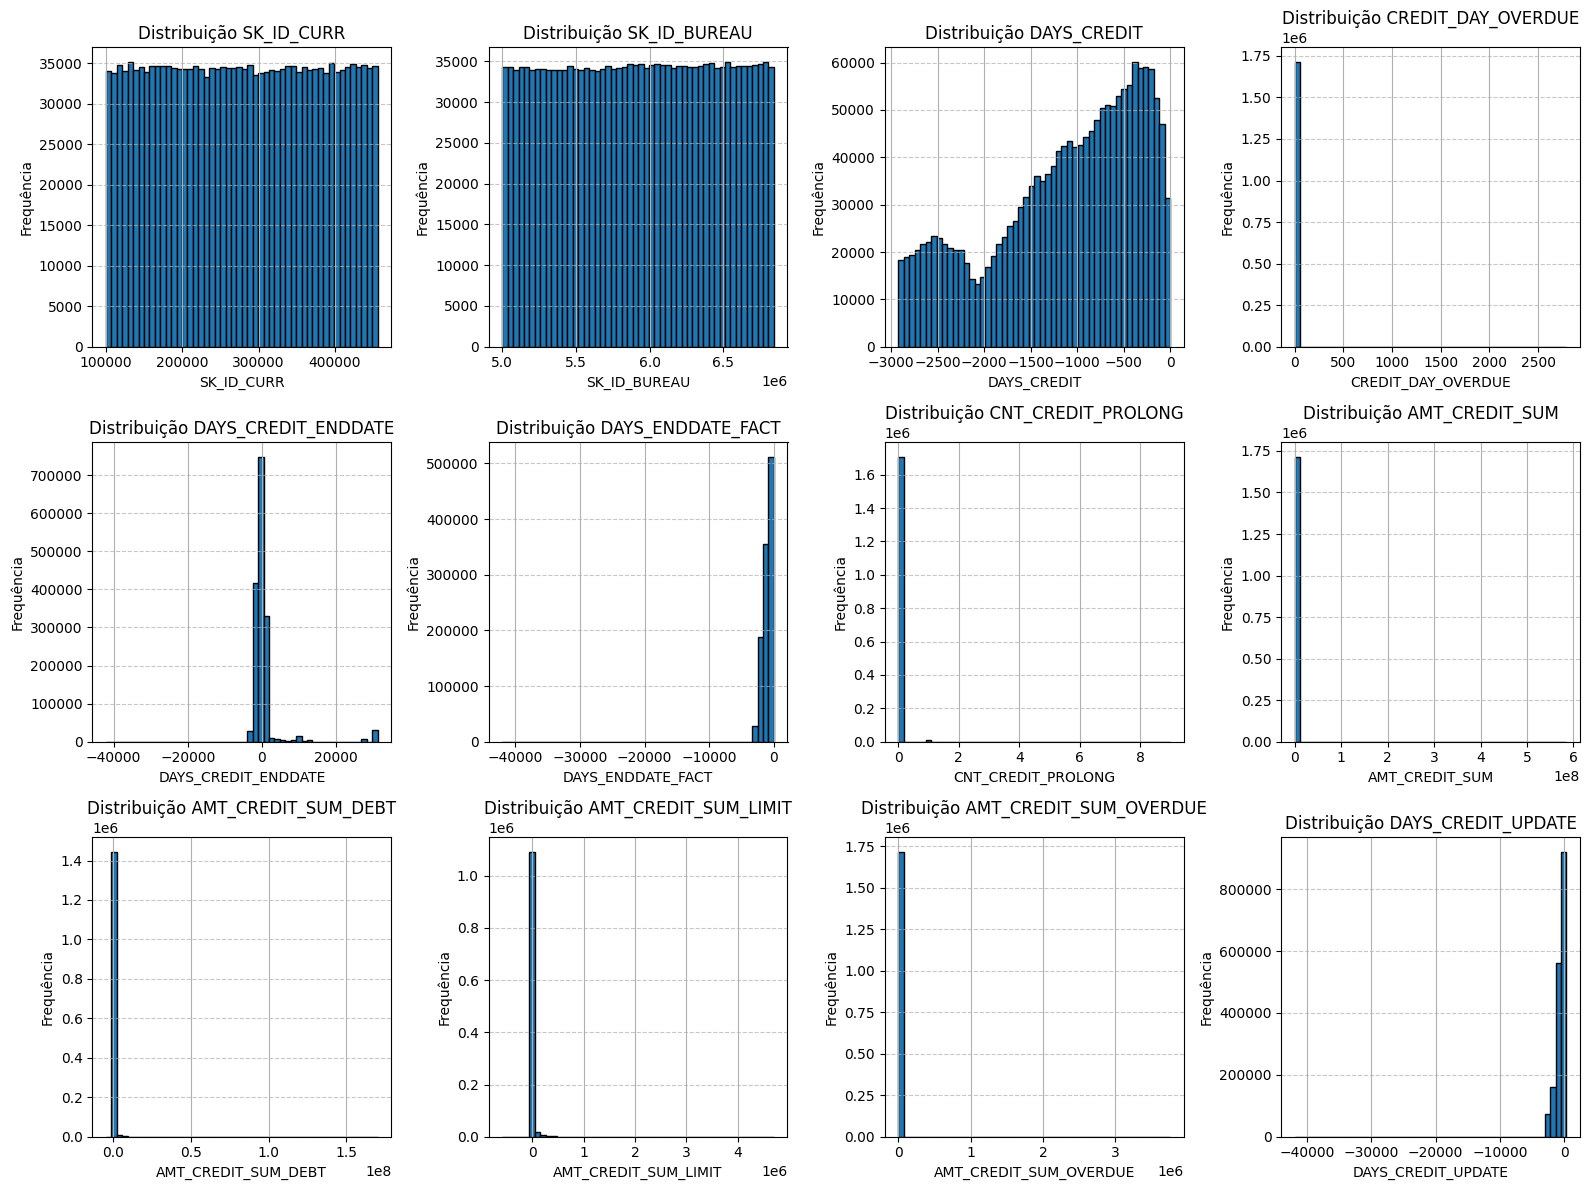

In [312]:
subplots_numeric_vars(bureau_df_handled, 50)

In [323]:
def subplots_outliers(df):
    num_cols_subplot = 4  
    num_vars = df.select_dtypes(include=['number']).columns  
    num_rows = int(np.ceil(len(num_vars) / num_cols_subplot))  
    
    fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(5 * num_cols_subplot, 4 * num_rows))  
    
    axes = axes.flatten()  # Transformar em array 1D para facilitar indexação

    for i, var in enumerate(num_vars):  
        sns.boxplot(x=df[var], ax=axes[i])  # Adiciona o subplot correto
        axes[i].set_title(f'Boxplot de {var}')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Ocultar subplots vazios
    for j in range(i + 1, len(axes)):  
        fig.delaxes(axes[j])  # Remove os subplots não usados

    plt.tight_layout()
    plt.show()


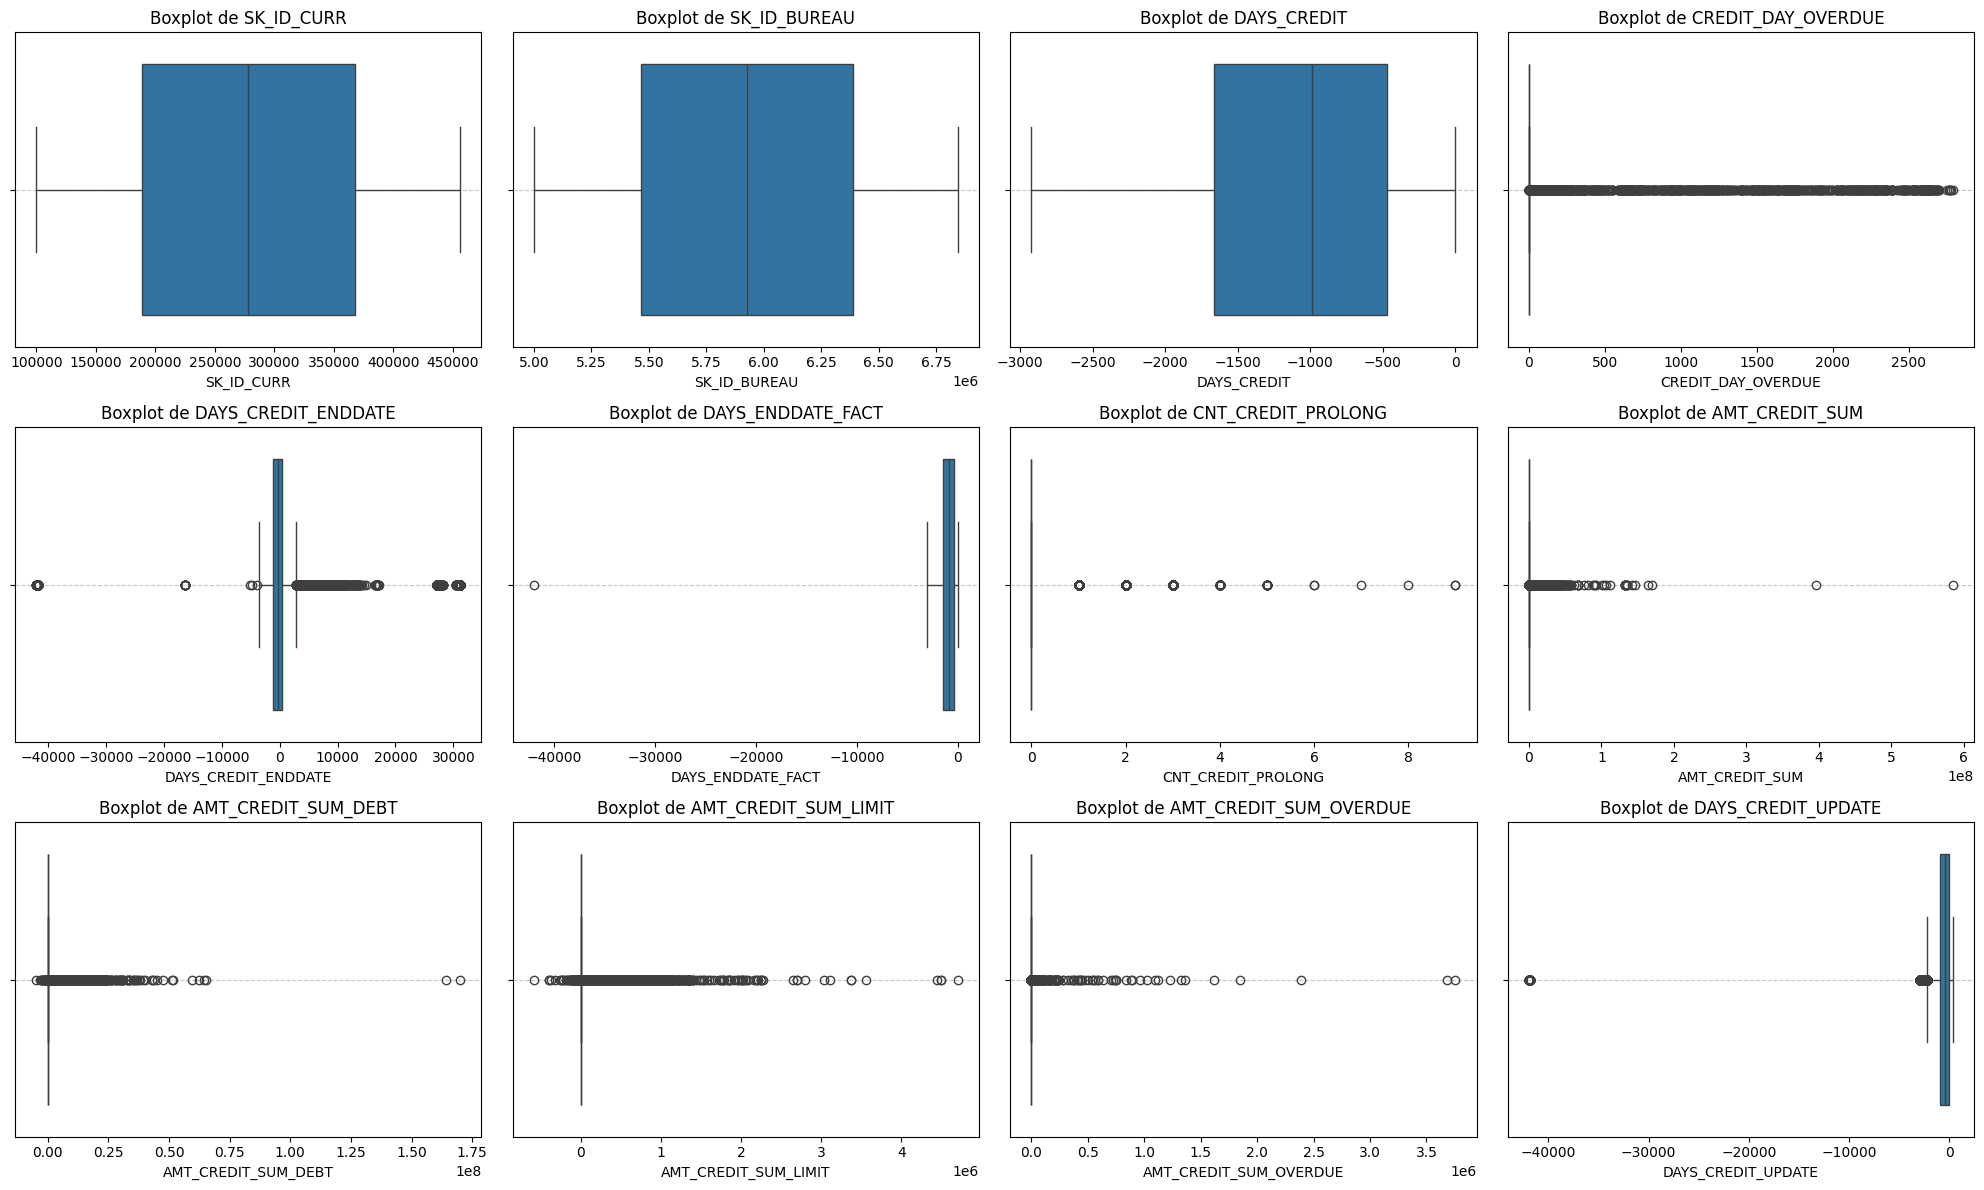

In [324]:
subplots_outliers(bureau_df_handled)

In [326]:
bureau_df_handled['CREDIT_DAY_OVERDUE'].value_counts()

CREDIT_DAY_OVERDUE
0       1712211
30          311
60          126
13          103
8           103
9            93
7            92
14           91
17           77
11           75
15           74
10           71
12           70
20           68
21           64
18           63
6            59
22           54
19           54
5            51
28           50
16           50
4            46
29           46
26           43
24           42
23           41
25           40
31           38
32           36
34           33
150          33
37           31
41           30
35           30
3            29
38           29
27           28
40           26
90           25
120          25
39           25
44           24
43           23
36           23
33           21
52           19
2            18
46           17
48           16
50           15
49           14
69           14
55           13
53           13
73           12
65           12
54           12
68           12
64           12
45           11
61   

In [327]:
(bureau_df_handled['CREDIT_DAY_OVERDUE'].value_counts(normalize=True)*100).round(2)

CREDIT_DAY_OVERDUE
0       99.75
30       0.02
60       0.01
13       0.01
8        0.01
9        0.01
7        0.01
14       0.01
17       0.00
11       0.00
15       0.00
10       0.00
12       0.00
20       0.00
21       0.00
18       0.00
6        0.00
22       0.00
19       0.00
5        0.00
28       0.00
16       0.00
4        0.00
29       0.00
26       0.00
24       0.00
23       0.00
25       0.00
31       0.00
32       0.00
34       0.00
150      0.00
37       0.00
41       0.00
35       0.00
3        0.00
38       0.00
27       0.00
40       0.00
90       0.00
120      0.00
39       0.00
44       0.00
43       0.00
36       0.00
33       0.00
52       0.00
2        0.00
46       0.00
48       0.00
50       0.00
49       0.00
69       0.00
55       0.00
53       0.00
73       0.00
65       0.00
54       0.00
68       0.00
64       0.00
45       0.00
61       0.00
51       0.00
56       0.00
58       0.00
67       0.00
77       0.00
42       0.00
79       0.00
76       0.00
5

In [328]:
(bureau_df_handled['AMT_CREDIT_SUM_DEBT'].value_counts(normalize=True)*100).round(2)

AMT_CREDIT_SUM_DEBT
 0.000          1016434
 4.500              653
-450.000            543
 135000.000         344
 90000.000          320
                 ...   
 700560.000           1
 1129.050             1
 456016.500           1
 3116920.500          1
 88666.155            1
Name: count, Length: 226537, dtype: int64

In [335]:
(bureau_df_handled['AMT_CREDIT_SUM_LIMIT'].value_counts(normalize=True)*100).round(2)

AMT_CREDIT_SUM_LIMIT
0.000          93.38
135000.000      0.19
4500.000        0.13
45000.000       0.12
90000.000       0.09
               ...  
49464.000       0.00
1004866.920     0.00
134338.230      0.00
75875.760       0.00
1872.585        0.00
Name: proportion, Length: 51726, dtype: float64

In [336]:
(bureau_df_handled['AMT_CREDIT_SUM_OVERDUE'].value_counts(normalize=True)*100).round(2)

AMT_CREDIT_SUM_OVERDUE
0.000         99.76
4.500          0.02
9.000          0.01
13.500         0.00
18.000         0.00
              ...  
5069.070       0.00
142.830        0.00
88.695         0.00
323.010        0.00
185224.500     0.00
Name: proportion, Length: 1616, dtype: float64

In [339]:
(bureu_df_handled['CNT_CREDIT_PROLONG'].value_counts(normalize=True)*100).round(2)

NameError: name 'bureu_df_handled' is not defined

In [314]:
print(bureau_df_handled.shape[1])

14


## Dataset bureau_balance

In [262]:
bureau_bal_df.shape

(27299925, 3)

In [82]:
bureau_bal_df.dtypes

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

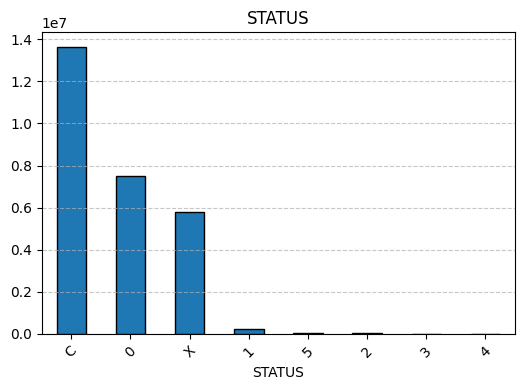

In [61]:
subplots_cat_vars(bureau_bal_df)

Status é uma variável que precisa ser categórica?

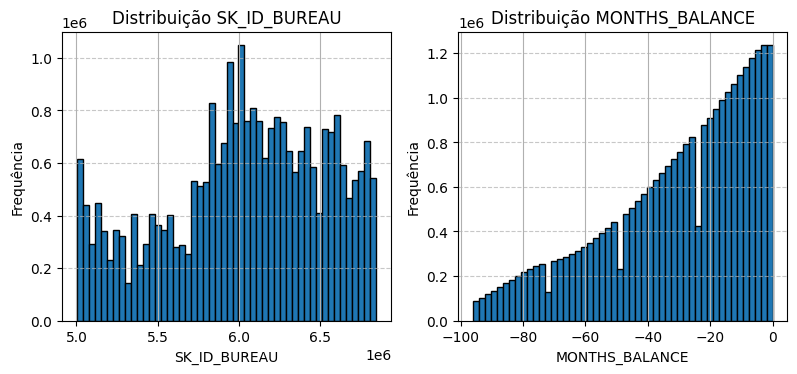

In [311]:
subplots_numeric_vars(bureau_bal_df, 50)

## Dataset POS_CASH_balance

In [79]:
pos_cash_bal_df

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943             -31            48.0   
1            1715348      367990             -33            36.0   
2            1784872      397406             -32            12.0   
3            1903291      269225             -35            48.0   
4            2341044      334279             -35            36.0   
...              ...         ...             ...             ...   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                          45.0               Active       0           0  
1                          35.0               Active       0           0  
2                           9.0               Active       0           0  
3                          42.0               Active       0           0  
4                          35.0               Active       0           0  
...                         ...                  ...     ...         ...  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  
10001357                    0.0            Completed       0           0  

[10001358 rows x 8 columns]

In [80]:
pos_cash_bal_df.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

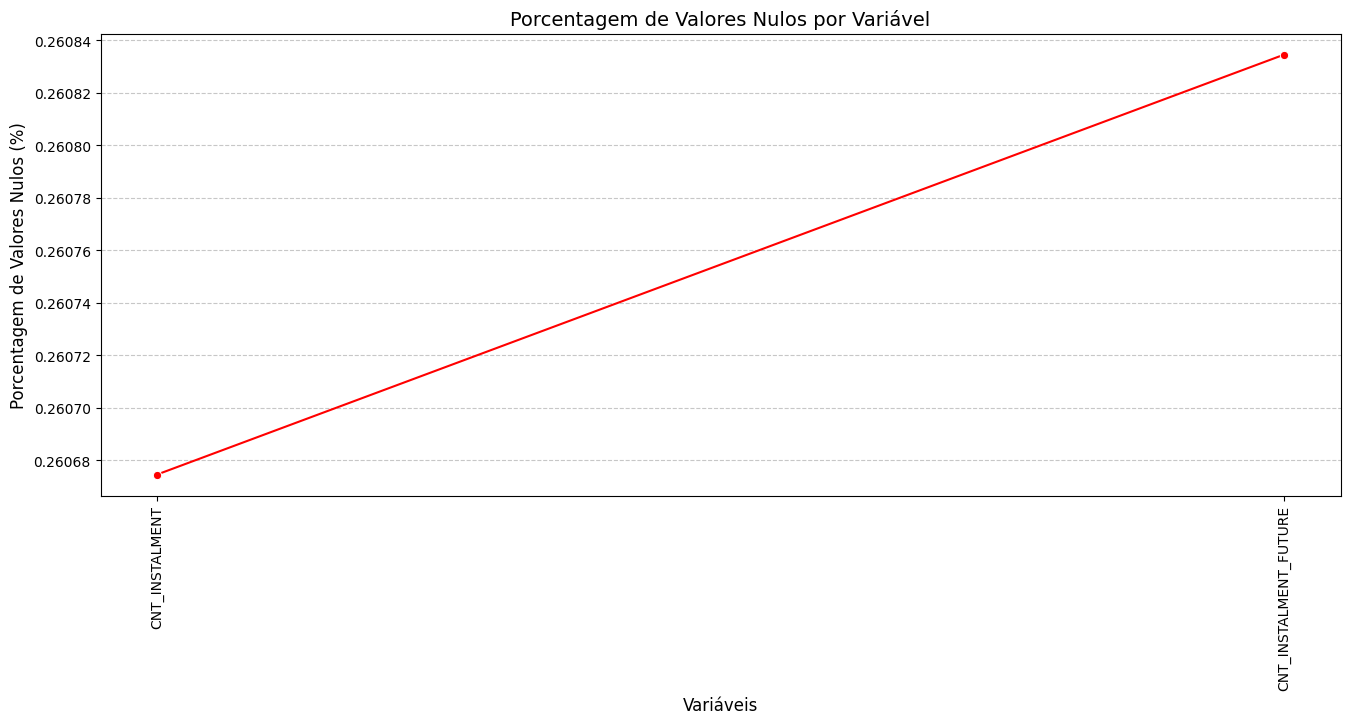

CNT_INSTALMENT           0.260675
CNT_INSTALMENT_FUTURE    0.260835
dtype: float64

In [83]:
plot_missing_values(pos_cash_bal_df)

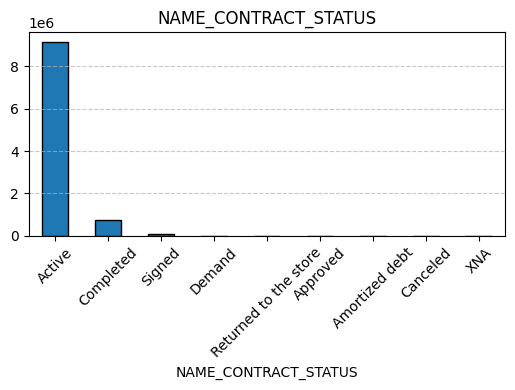

In [84]:
subplots_cat_vars(pos_cash_bal_df)

In [85]:
pos_cash_bal_df['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64

In [307]:
subplots_numeric_vars(pos_cash_bal_df)

NameError: name 'pos_cash_bal_df' is not defined

## Dataset credit_card_balance

In [87]:
credit_card_bal

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           2562384      378907              -6       56.970   
1           2582071      363914              -1    63975.555   
2           1740877      371185              -7    31815.225   
3           1389973      337855              -4   236572.110   
4           1891521      126868              -1   453919.455   
...             ...         ...             ...          ...   
3840307     1036507      328243              -9        0.000   
3840308     1714892      347207              -9        0.000   
3840309     1302323      215757              -9   275784.975   
3840310     1624872      430337             -10        0.000   
3840311     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0                         135000                       0.0   
1                          45000                    2250.0   
2                         450000                       0.0   
3                         225000                    2250.0   
4                         450000                       0.0   
...                          ...                       ...   
3840307                    45000                       NaN   
3840308                    45000                       0.0   
3840309                   585000                  270000.0   
3840310                   450000                       NaN   
3840311                   157500                       0.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                       877.5                         0.0   
1                      2250.0                         0.0   
2                         0.0                         0.0   
3                      2250.0                         0.0   
4                     11547.0                         0.0   
...                       ...                         ...   
3840307                   0.0                         NaN   
3840308                   0.0                         0.0   
3840309              270000.0                         0.0   
3840310                   0.0                         NaN   
3840311                   0.0                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
0                           877.5                 1700.325  ...   
1                             0.0                 2250.000  ...   
2                             0.0                 2250.000  ...   
3                             0.0                11795.760  ...   
4                         11547.0                22924.890  ...   
...                           ...                      ...  ...   
3840307                       NaN                    0.000  ...   
3840308                       0.0                    0.000  ...   
3840309                       0.0                 2250.000  ...   
3840310                       NaN                    0.000  ...   
3840311                       0.0                    0.000  ...   

         AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  \
0                0.000                 0.000                       0.0   
1            64875.555             64875.555                       1.0   
2            31460.085             31460.085                       0.0   
3           233048.970            233048.970                       1.0   
4           453919.455            453919.455                       0.0   
...                ...                   ...                       ...   
3840307          0.000                 0.000                       NaN   
3840308          0.000                 0.000                       0.0   
3840309     273093.975            273093.975                       2.0   
3840310          0.000                 0.000                       NaN   
3840311          0.000                 0.000                       0.0   

         CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0      

In [89]:
credit_card_bal.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

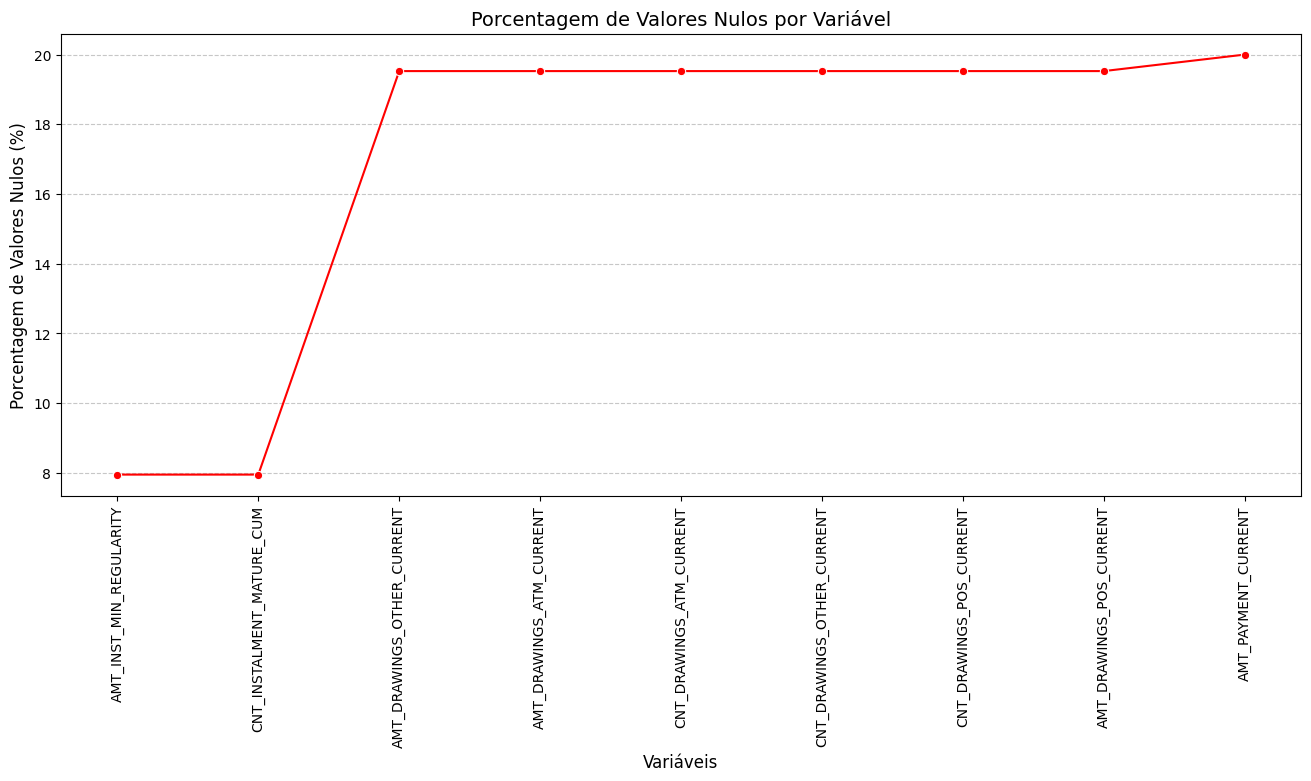

AMT_INST_MIN_REGULARITY        7.948208
CNT_INSTALMENT_MATURE_CUM      7.948208
AMT_DRAWINGS_OTHER_CURRENT    19.524872
AMT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_POS_CURRENT      19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
AMT_PAYMENT_CURRENT           19.998063
dtype: float64

In [90]:
plot_missing_values(credit_card_bal)

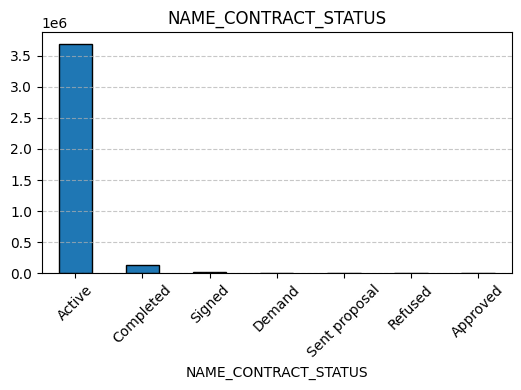

In [91]:
subplots_cat_vars(credit_card_bal)

Mesma variável que tem no dataset POS_CASH_bal

In [306]:
subplots_numeric_vars(credit_card_bal)

NameError: name 'credit_card_bal' is not defined

MONTHS_BALANCE também é a mesma variável?

## Dataset previous application

In [93]:
prev_app_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

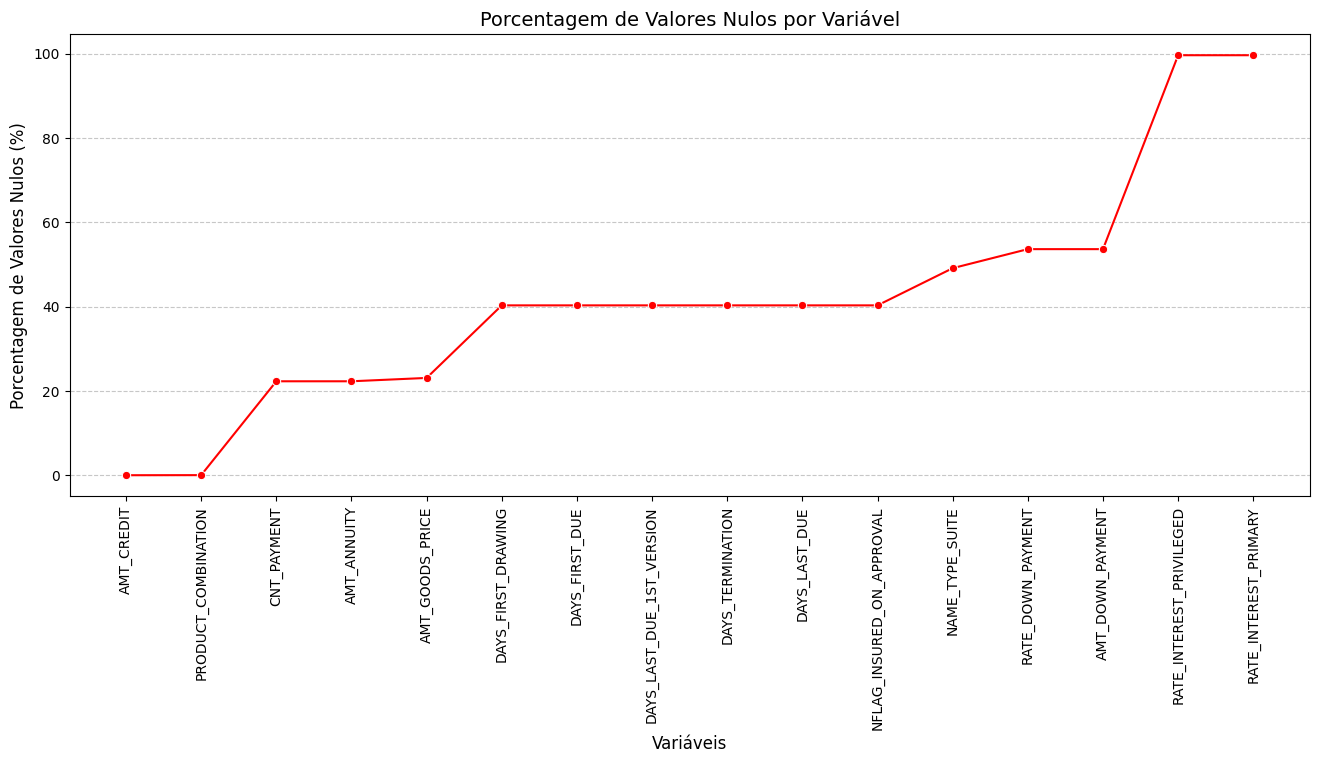

AMT_CREDIT                    0.000060
PRODUCT_COMBINATION           0.020716
CNT_PAYMENT                  22.286366
AMT_ANNUITY                  22.286665
AMT_GOODS_PRICE              23.081773
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
NAME_TYPE_SUITE              49.119754
RATE_DOWN_PAYMENT            53.636480
AMT_DOWN_PAYMENT             53.636480
RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
dtype: float64

In [94]:
plot_missing_values(prev_app_df)

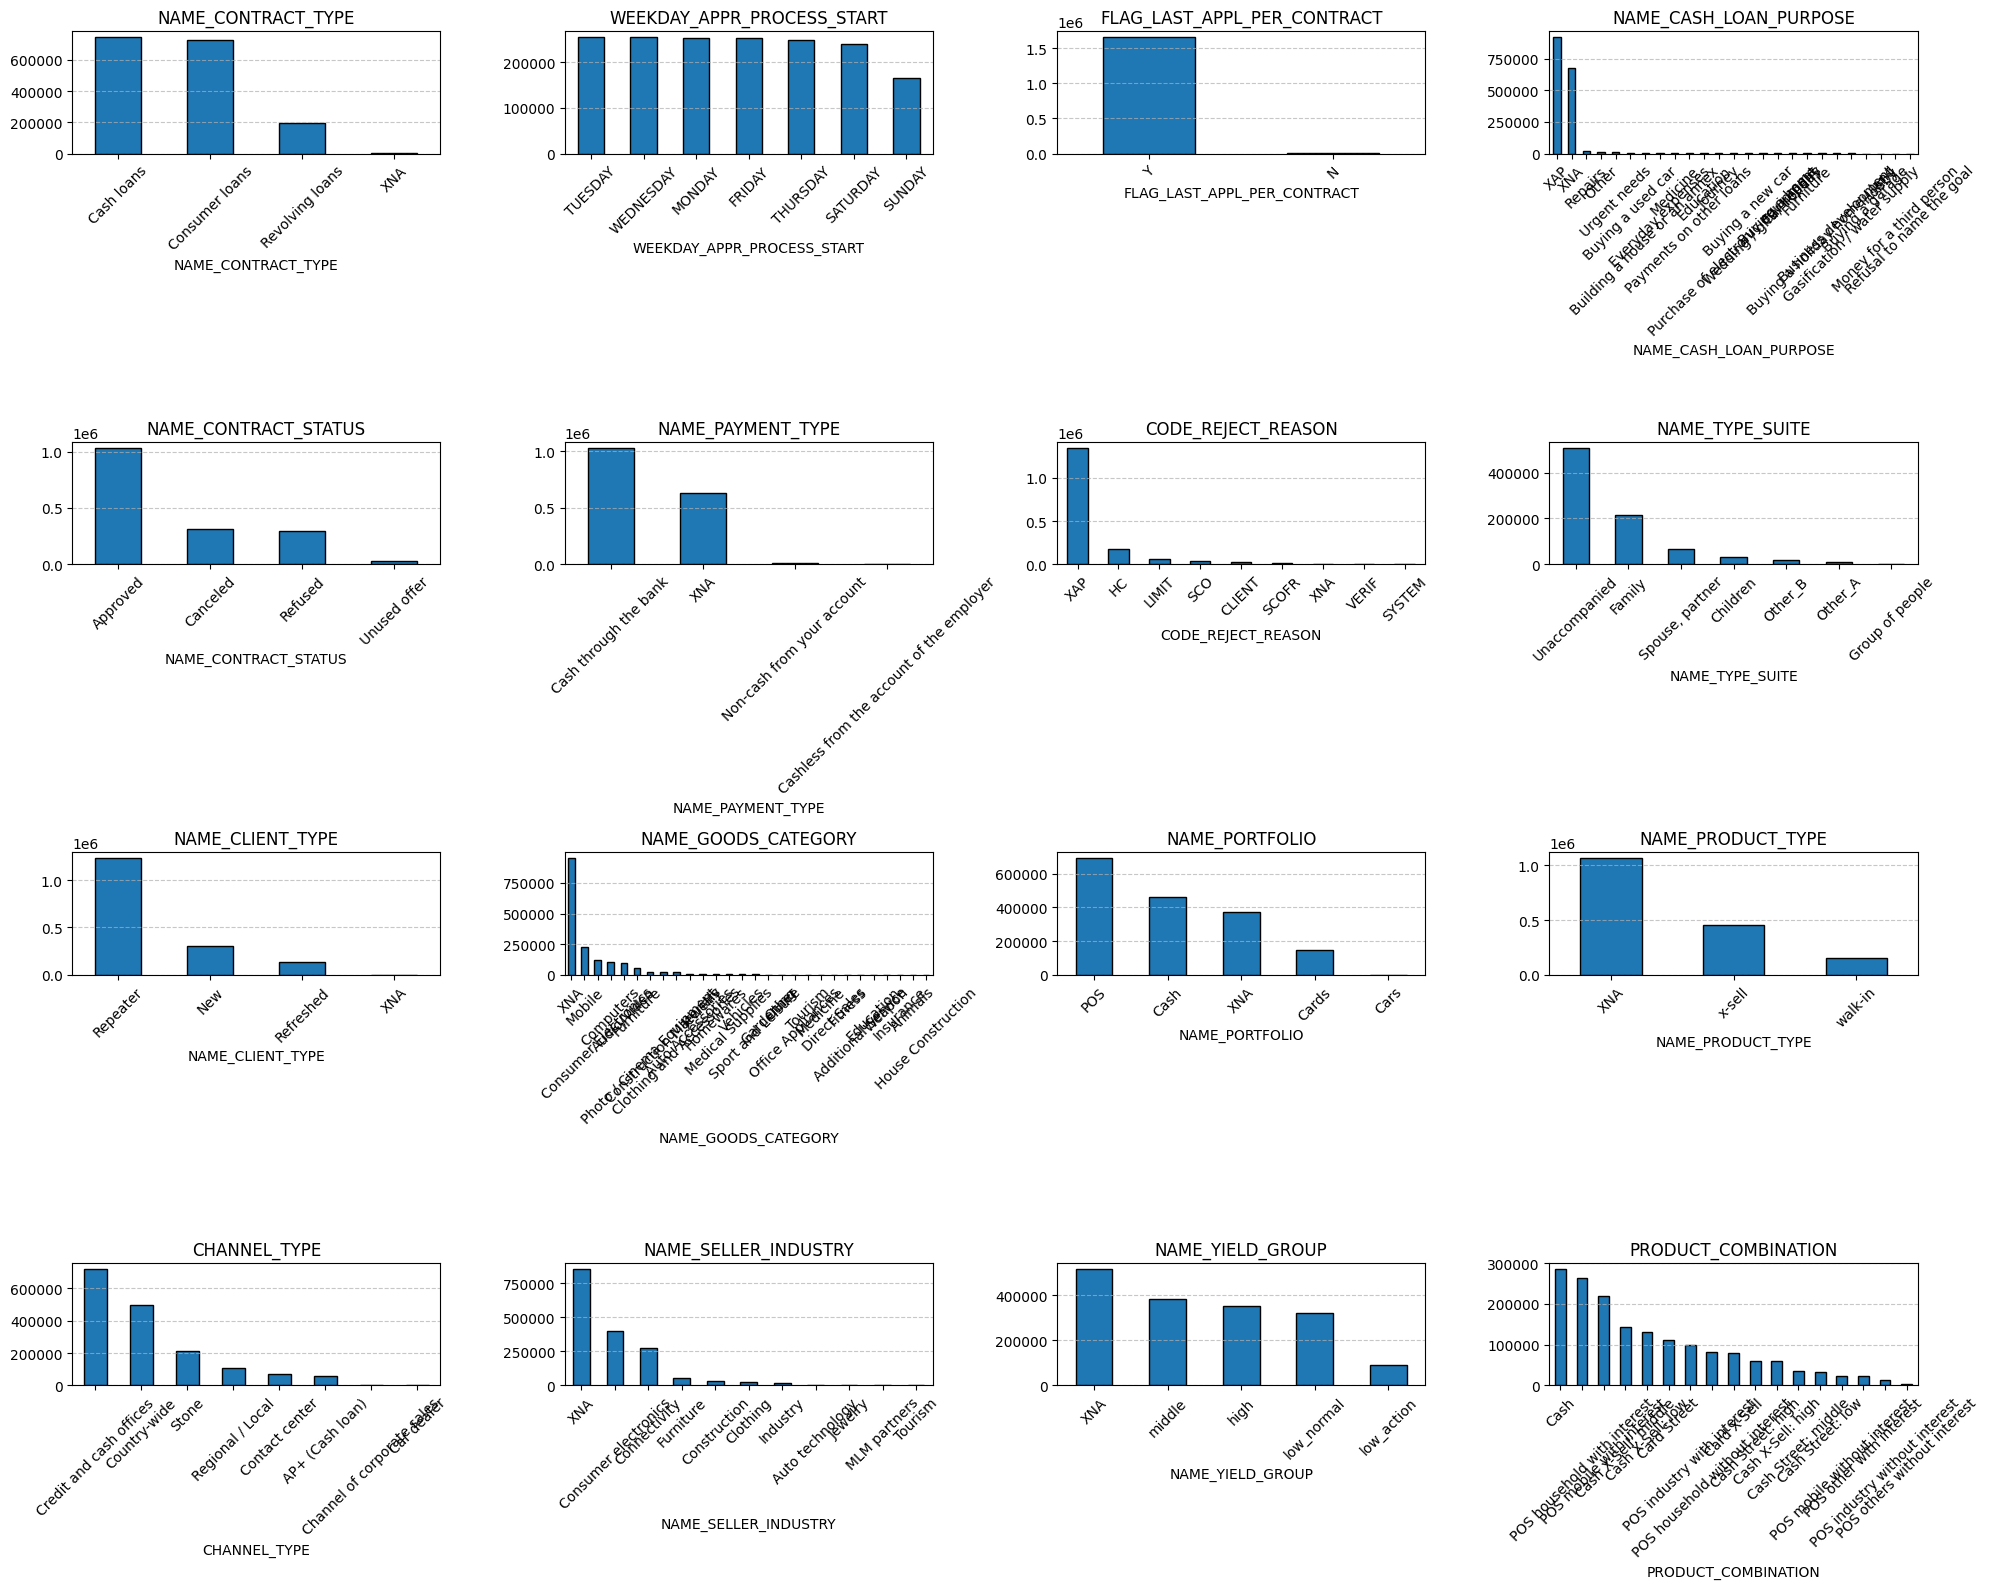

In [95]:
subplots_cat_vars(prev_app_df)

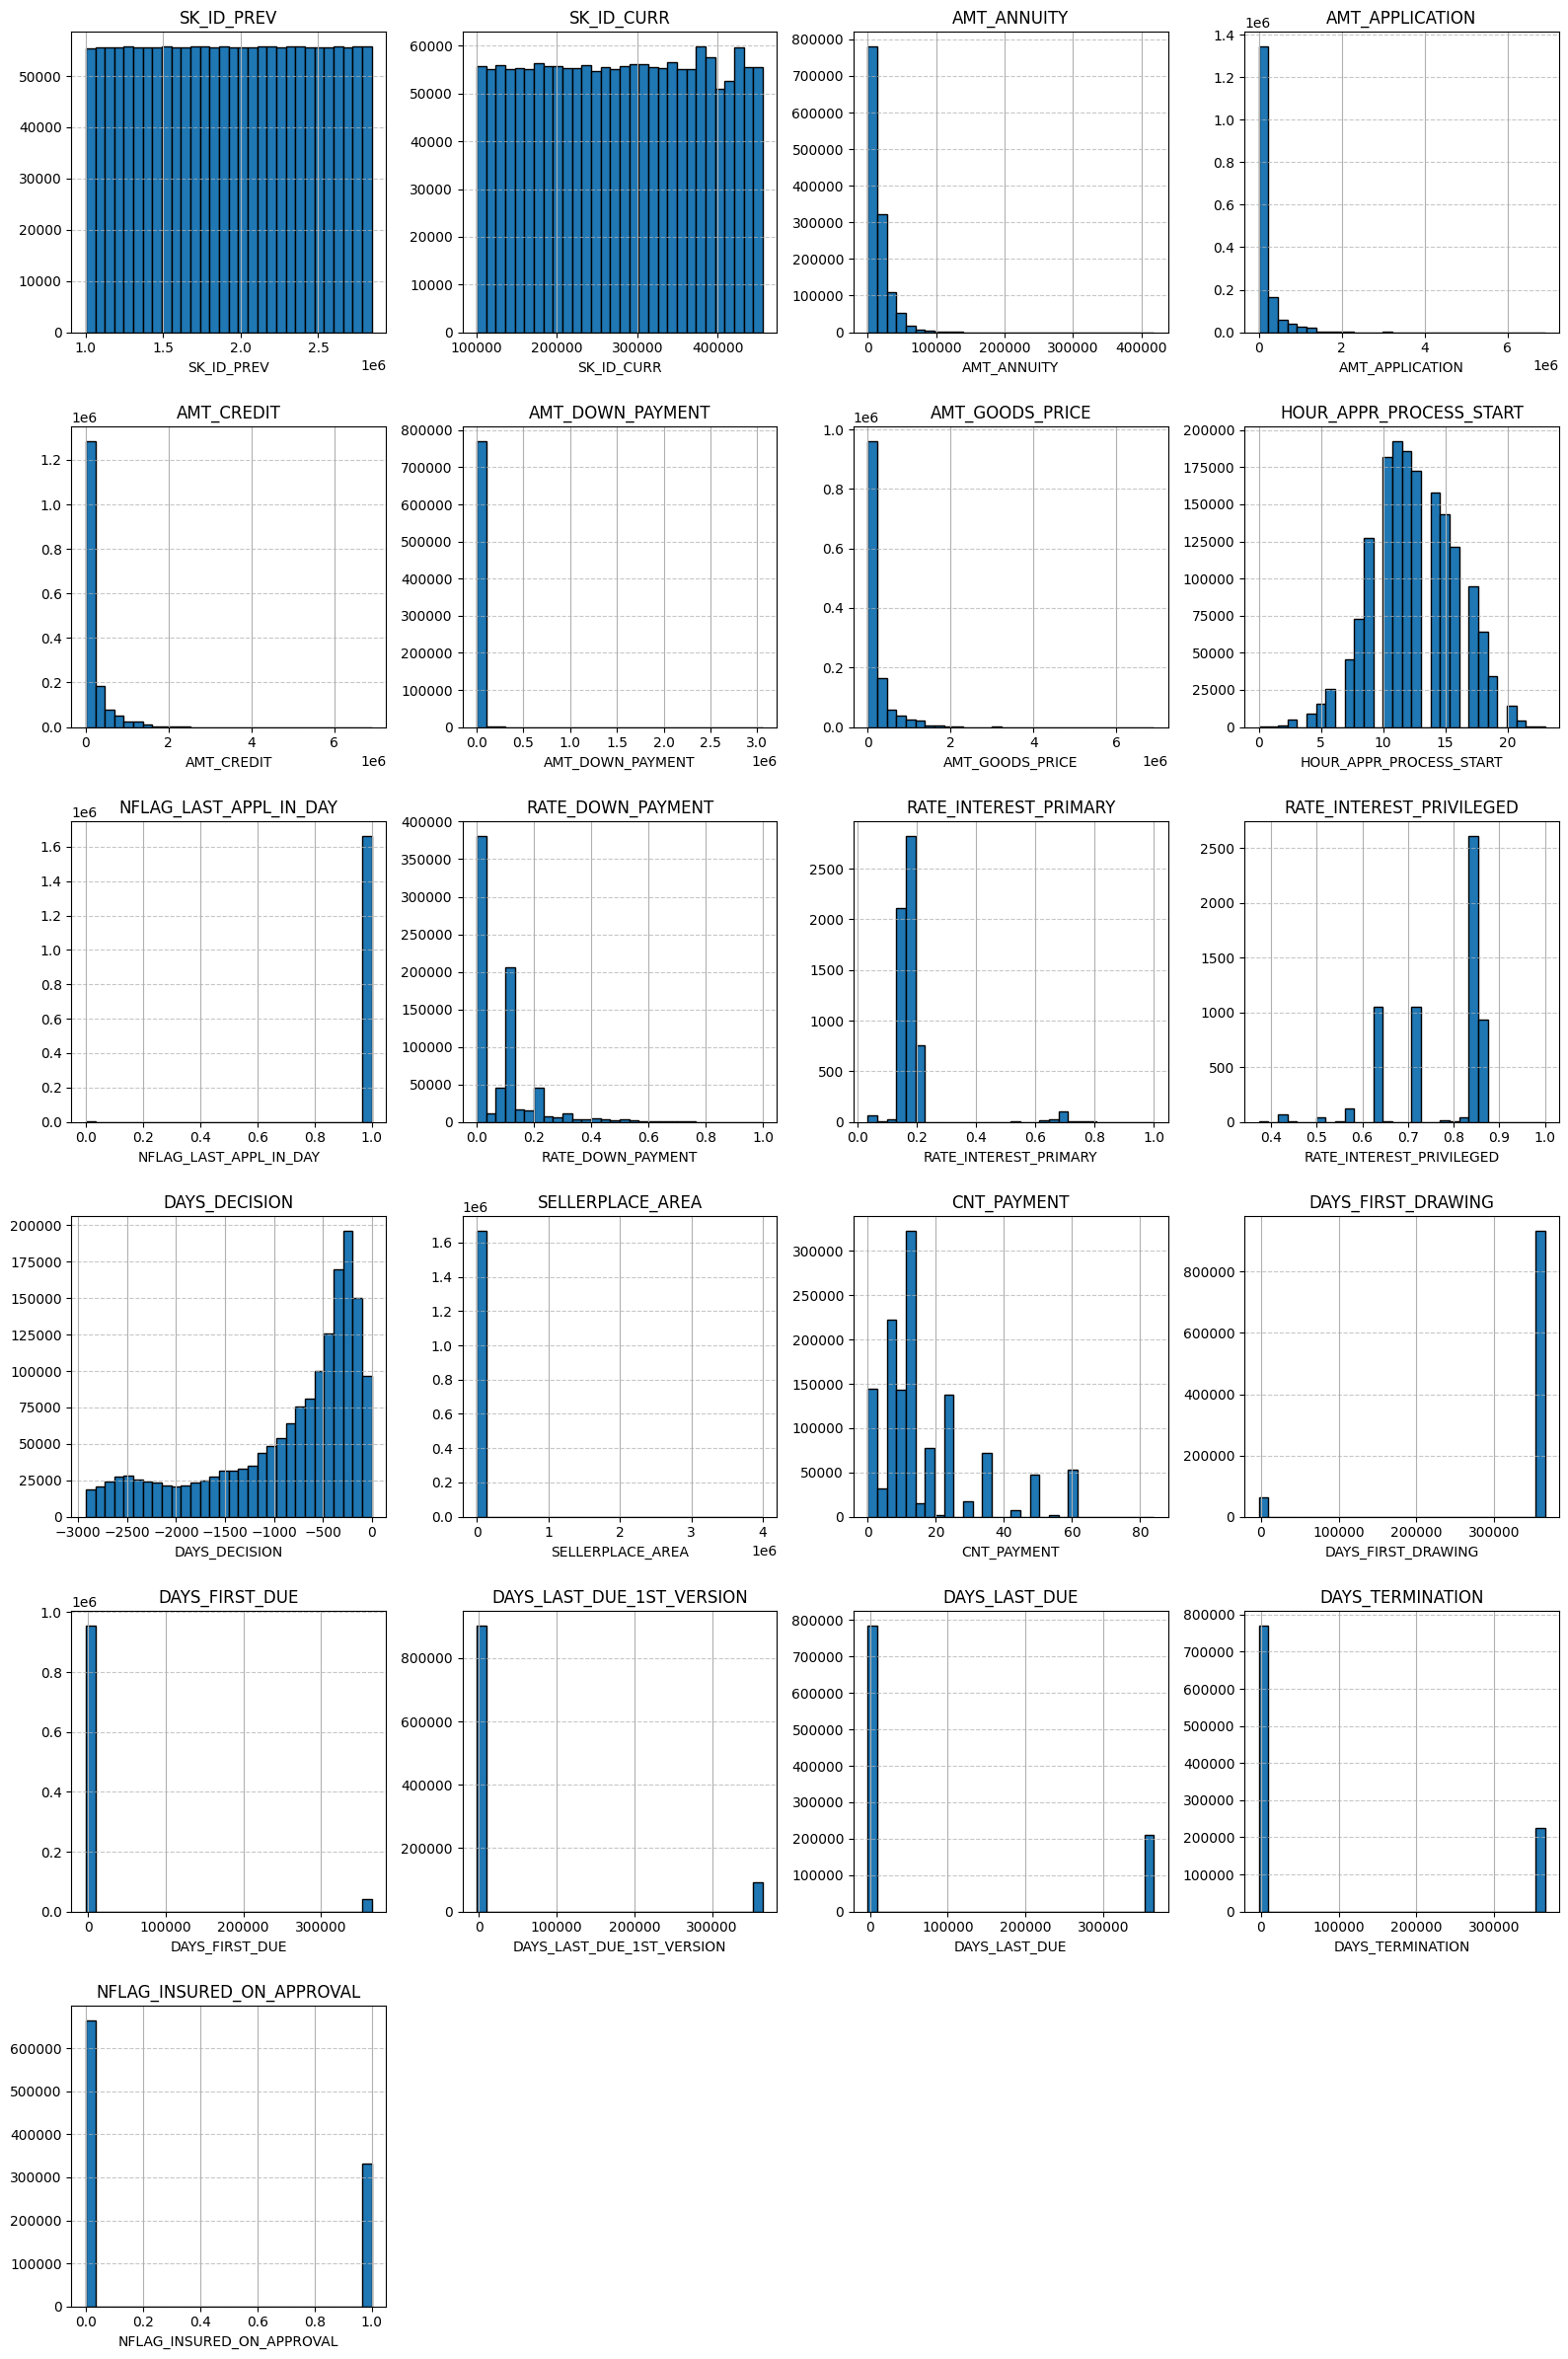

In [96]:
subplots_numeric_vars(prev_app_df)

#### Fator de inflação da variância (VIF)

O VIF é uma forma de verificar se variáveis em um conjunto de dados possuem multicolinearidade. Ele mede o quanto a variância de uma variável independente é inflada pela correlação com outras variáveis do dataset. 

- VIF = 1: Isso indica que não há multicolinearidade. 
- VIF entre 1 e 5: Isso sugere multicolinearidade moderada. Há alguma correlação com outros preditores, mas geralmente não é grave. 
- VIF > 5: Há alta multicolinearidade. O erro padrão do preditor pode estar visivelmente inflado, o que pode tornar seu coeficiente menos confiável.
- VIF > 10: Isso indica uma multicolinearidade grave. O erro padrão do preditor está muito inflado, e a estimativa do coeficiente provavelmente é instável.

In [32]:
'''

X = app_train_df_handled[app_train_df_handled.select_dtypes(include=['number']).columns]
X = X.drop(columns=['TARGET'])
# Add a constant to the model (intercept)
X = add_constant(X)

app_train_vif_df = pd.DataFrame()
app_train_vif_df['Feature'] = X.columns
app_train_vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remover a constante da tabela final
vif_data = vif_data[vif_data["Feature"] != "const"]

vif_data = vif_data.sort_values(by="VIF", ascending=False)
'''

'\n\nX = app_train_df_handled[app_train_df_handled.select_dtypes(include=[\'number\']).columns]\nX = X.drop(columns=[\'TARGET\'])\n# Add a constant to the model (intercept)\nX = add_constant(X)\n\napp_train_vif_df = pd.DataFrame()\napp_train_vif_df[\'Feature\'] = X.columns\napp_train_vif_df[\'VIF\'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\n\n# Remover a constante da tabela final\nvif_data = vif_data[vif_data["Feature"] != "const"]\n\nvif_data = vif_data.sort_values(by="VIF", ascending=False)\n'

## Dataset installments_payments

In [98]:
install_pay_df.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

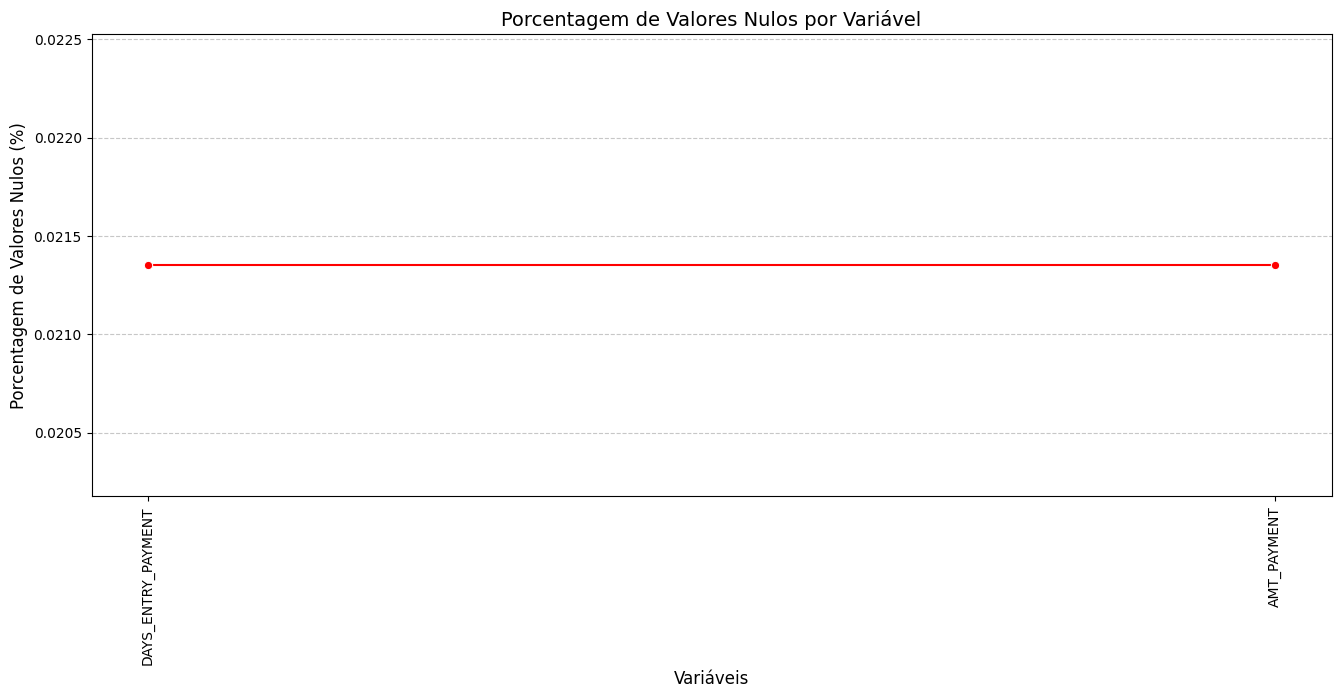

DAYS_ENTRY_PAYMENT    0.021352
AMT_PAYMENT           0.021352
dtype: float64

In [99]:
plot_missing_values(install_pay_df)

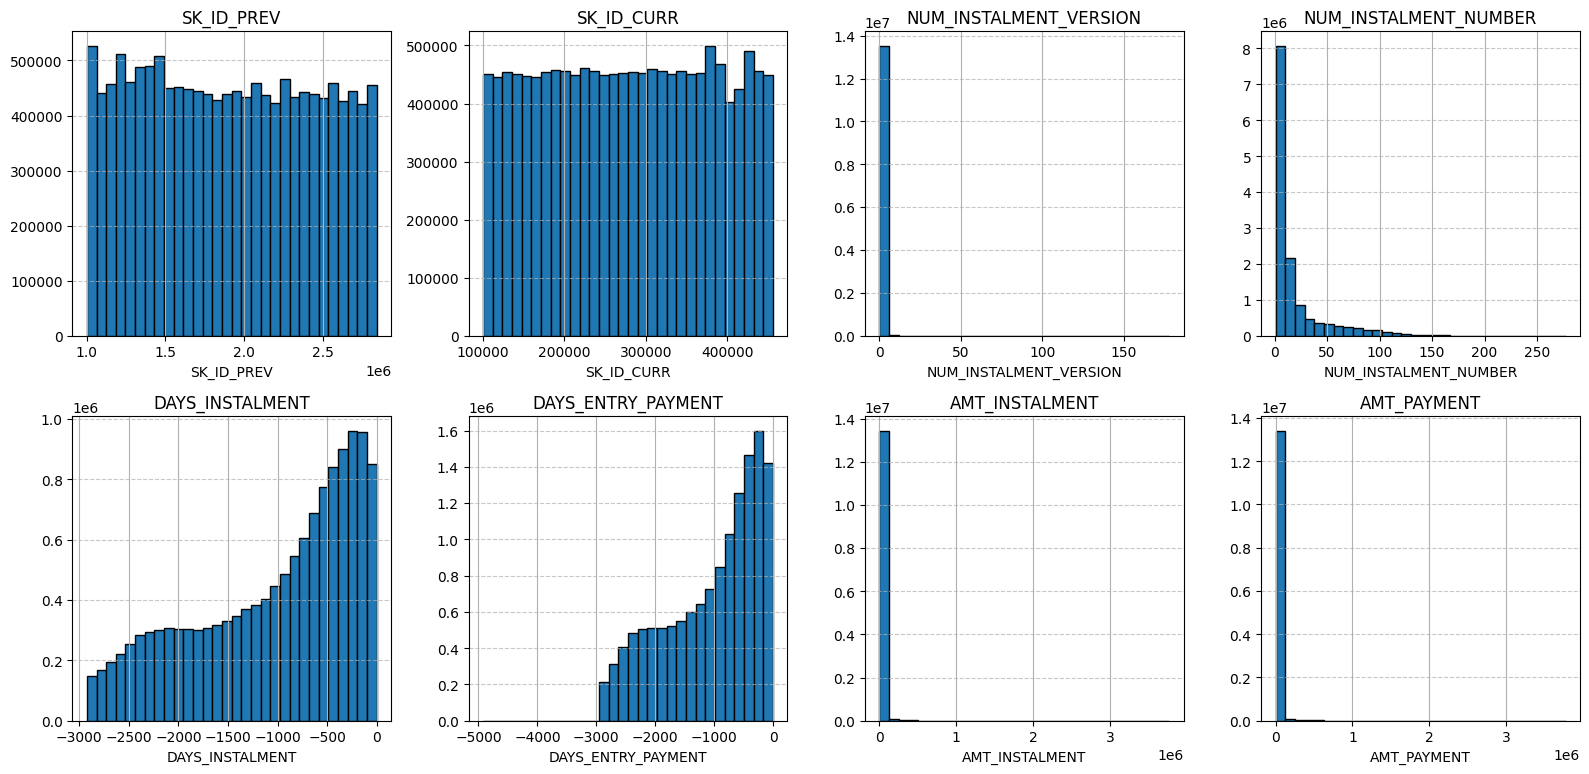

In [101]:
subplots_numeric_vars(install_pay_df)